# Lab 01: Data pre-processing

## Instructions

### How to do your homework

To finish the project, fill in:
- ```YOUR CODE HERE``` in code cells

- ```YOUR ANSWER HERE``` in text cells.

**NOTE:**

- Your project must be finished by your own self. You may discuss with the others, but must not copy (partially or entirely) their codes or solutions. You will receive a <font color='red'>0 point</font> for this project if you violate this plagiarism rule. 
- Because our plagiarism checker is very sensitive, if the plagiarism check result is <font color='red'>greater than 60%</font>, your work will receive <font color='red'>0 point</font>. Therefore we will not deal with plagiarism cases.

- You can create new cells to clarify your code / answer, however, please <font color='red'>do not delete any pre-defined code cells or test case cells</font> as it may affect the grading results.

### How to submit

In the grading stage, I will first select `Kernel` - `Restart Kernel & Run All Cells` to restart and run all cells in your notebook. As a result, before submitting your project, you should run `Kernel` - `Restart Kernel & Run All Cells` to ensure your code will run as you expect.

After that, rename your notebook as `ID1.ipynb` (e.g. `19123.ipynb`) and submit on Moodle.

<font color=yellow>Please follow the above submission guidelines. Any violation of these instructions may cost you some penalty points (30%)!!! No late submissions will be accepted.</font>



### Contents

- Data pre-processing techniques.
    - Exploring your data (2 pts)
    - Encoding categorical (2 pts)
    - Discretization techniques (2 pts)
    - Outlier handling techniques (1 pts)
    - Feature scaling techniques (2 pts)
    - Clean submission (1 pts)

## Import libs
**Note:** <span style="color:yellow">All packages you can use in this lab are imported in the cell below. Please don't modify this, just run that.</span>

In [469]:
import warnings
warnings.filterwarnings('ignore')

In [470]:
import sys
import json
from zlib import adler32

from typing import List, Dict

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder, StandardScaler, MinMaxScaler, MaxAbsScaler, Normalizer

In [471]:
# Config matplotlib and pandas display
%matplotlib inline
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [472]:
# Config seaborn
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

In [473]:
# Checking Python virtual env
sys.executable

'C:\\Users\\ACER\\AppData\\Local\\Microsoft\\WindowsApps\\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\\python.exe'

## Exploring your data (2 pts)

### Read rawdata from file

In [474]:
# YOUR CODE HERE

raw_df = pd.read_csv(".\data\spaceX_laucnh.csv")  

# raise NotImplementedError()

In [475]:
# TEST
raw_df.head()

,uct_time,launch_name,payloads,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,2006-03-24T22:30:00.000Z,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
1,2007-03-21T01:10:00.000Z,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
2,2008-08-03T03:34:00.000Z,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Failure
3,2008-09-28T23:15:00.000Z,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,NaN,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success
4,2009-07-13T03:35:00.000Z,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,0,22.25,1.68,30146.0,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,NaN,"(nan, nan)",Success


### How many rows and how many columns does the raw data have?

Next, you calculate the number of rows and columns of the DataFrame `raw_df` and store it in the variable `shape` (tuple).

In [476]:
# YOUR CODE HERE
shape = raw_df.shape
#raise NotImplementedError()

In [477]:
# TEST
assert adler32(str(np.sqrt(shape[0] * shape[1])).encode()) == 590480314

### What does each line mean? Does it matter if the lines have different meanings?

**TODO**: 

Mỗi hàng trong dataframe đại diện cho một lần phóng tên lửa. Và vì là những lần phóng khác nhau nên mỗi dòng khác nhau là việc hiển nhiên, ngay từ những thông tin cơ bản như thời điểm phóng, tên của tên lửa, tải trọng, ... đã khác nhau. 

Việc những dòng của dataframe có ý nghĩa khác nhau sẽ có ảnh hưởng tới việc nghiên cứu và khai thác dữ liệu, theo những chiều hướng khác nhau:
- Trước hết, dữ liệu không đồng nhất có thể gây sai lệch khi tính toán trung bình hoặc tổng hợp, do đó cần xử lý giá trị thiếu và tách nhóm dữ liệu phù hợp. 
- Khi trực quan hóa, nếu dữ liệu bị pha trộn, biểu đồ có thể trở nên nhiễu và khó nhận diện xu hướng, vì vậy cần lọc và vẽ biểu đồ riêng cho từng nhóm. 
- Trong dự đoán và phân loại, nếu không phân biệt rõ các đặc trưng giữa các lần phóng, mô hình học máy có thể học sai quy luật, nên việc chuẩn hóa và nhóm dữ liệu là rất quan trọng. 
- Cuối cùng, khi tìm kiếm mối quan hệ giữa các yếu tố, nếu không tách biệt rõ ràng các thông tin như loại tên lửa hay địa điểm phóng, kết luận có thể bị sai lệch, do đó cần phân nhóm trước khi phân tích. 

Nhìn chung, hiểu rõ ý nghĩa của từng dòng trong dữ liệu là điều cần thiết để đảm bảo phân tích chính xác, tránh sai lệch và tối ưu hiệu quả khai thác dữ liệu.

### Does the raw data have duplicate rows?

Next, you calculate the number of rows with duplicate indexes and store it in the variable `num_duplicated_rows`. In a group of lines with the same index, the first line is not counted as repeated.

In [478]:
# YOUR CODE HERE
num_duplicated_rows = raw_df.duplicated().sum()

# raise NotImplementedError()

In [479]:
# TEST
assert adler32(str(num_duplicated_rows).encode()) == 3211313

### What does each column mean?

To see the meaning of each column:
- First, you need to read the file "metadata.json" in the `data` folder into DataFrame `metadata`;
- Then, you describe what suitable datatype for each column? 

In [480]:
# YOUR CODE HERE
with open("./data/metadata.json", "r") as f:
    metadata = pd.DataFrame(json.load(f))
    
# raise NotImplementedError()

In [481]:
# TEST
metadata

,title,description,source,certificate_link,certificate,attributions
uct_time,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch date in UTC format.
launch_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,Launch name. Typically the name of the space mission.
payloads,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The list information about the payloads on the launch.
rocket_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the rocket.
rocket_boosters,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The number of boosters on the rocket.
rocket_height,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The height information about the rocket (m).
rocket_diameter,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The diameter information about the rocket (m).
rocket_mass,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The mass information about the rocket (kg).
launchpad_name,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The name of the launchpad.
launchpad_region,SpaceX Launches 2006-2022,The SpaceX Launches dataset contains information about launches and landings of SpaceX rockets f...,https://api.spacexdata.com/v5/launches/latest,https://github.com/r-spacex/SpaceX-API/tree/master?tab=Apache-2.0-1-ov-file#readme,Apache-2.0,The region of the launchpad.


**TODO: Describe datatype**

### Mô tả kiểu dữ liệu của từng cột trong dataframe

| Cột                 | Kiểu dữ liệu       | Mô tả |
|---------------------|------------------|------|
| **`uct_time`**      | `datetime`       | Ngày giờ phóng ở định dạng UTC. |
| **`launch_name`**   | `string`         | Tên của lần phóng. |
| **`payloads`**      | `list[dict]`     | Danh sách chứa thông tin về tải trọng (payload). |
| **`rocket_name`**   | `string`         | Tên tên lửa. |
| **`rocket_boosters`** | `integer`      | Số lượng boosters của tên lửa. |
| **`rocket_height`**  | `float`         | Chiều cao của tên lửa (mét). |
| **`rocket_diameter`** | `float`       | Đường kính của tên lửa (mét). |
| **`rocket_mass`**    | `float`         | Khối lượng của tên lửa (kg), có thể có giá trị `NaN`. |
| **`launchpad_name`** | `string`        | Tên của bãi phóng. |
| **`launchpad_region`** | `string`     | Khu vực của bãi phóng. |
| **`launchpad_geo`** | `dict`          | Thông tin vị trí địa lý của bãi phóng. |
| **`landpad`**       | `dict` hoặc `None` | Thông tin về bãi hạ cánh. |
| **`landpad_name`**  | `string` hoặc `None` | Tên bãi hạ cánh. |
| **`landpad_type`**  | `string` hoặc `None` | Loại bãi hạ cánh. |
| **`landpad_region`** | `string` hoặc `None` | Khu vực bãi hạ cánh. |
| **`landpad_geo`**   | `dict` hoặc `None` | Vị trí địa lý của bãi hạ cánh. |
| **`outcome`**       | `boolean`        | Kết quả phóng thành công (`True`) hoặc thất bại (`False`). |


Nhìn chung, bộ dữ liệu này bao gồm các kiểu dữ liệu chính:  
- **Chuỗi (`string`)**: Tên lửa, bãi phóng, khu vực, loại bãi hạ cánh.  
- **Số nguyên (`integer`)**: Số lượng boosters.  
- **Số thực (`float`)**: Chiều cao, đường kính, khối lượng tên lửa.  
- **Danh sách (`list`)**: Payloads chứa nhiều phần tử.  
- **Từ điển (`dict`)**: Thông tin vị trí địa lý.  
- **Boolean (`boolean`)**: Kết quả phóng thành công hay thất bại.  





Before moving forward, you should read the results displayed above and make sure you understand the meaning of the columns. To understand the meaning of the column, you may need to look at the values of the DataFrame side column `raw_df`.

### What data type does each column currently have? Are there any columns whose data types are not suitable for further processing?

Next, you calculate the data type (dtype) of each column in DataFrame `raw_df` and save the result into Series `dtypes` (This Series has the index as the column name).

In [482]:
# YOUR CODE HERE

dtypes = raw_df.dtypes
# aise NotImplementedError()

In [483]:
# TEST
dtypes = raw_df.dtypes

int_cols = set(dtypes[(dtypes==np.int32) | (dtypes==np.int64)].index)
assert adler32(str(len(int_cols)).encode()) == 3276850

float_cols = set(dtypes[(dtypes==np.float32) | (dtypes==np.float64)].index)
assert adler32(str(len(float_cols)).encode()) == 3473461

object_cols = set(dtypes[dtypes == object].index)
assert adler32(str(len(object_cols)).encode()) == 9830500

#### Convert datatype for UCT times attribute

The datatype of the column `uct_time` should be datetime. You have to convert it to the right datatype. 

In [484]:
# YOUR CODE HERE

raw_df["uct_time"] = pd.to_datetime(raw_df["uct_time"], utc=True)
# raise NotImplementedError()

In [485]:
# TEST
raw_df["uct_time"].dtype

datetime64[ns, UTC]

For the remain columns, we will process later. :)

### Exploring datetime attributes

In [486]:
datetime_col_df = raw_df.select_dtypes(include=['datetime64','datetime64[ns, UTC]'])
datetime_col_df.head()

,uct_time
0,2006-03-24 22:30:00+00:00
1,2007-03-21 01:10:00+00:00
2,2008-08-03 03:34:00+00:00
3,2008-09-28 23:15:00+00:00
4,2009-07-13 03:35:00+00:00


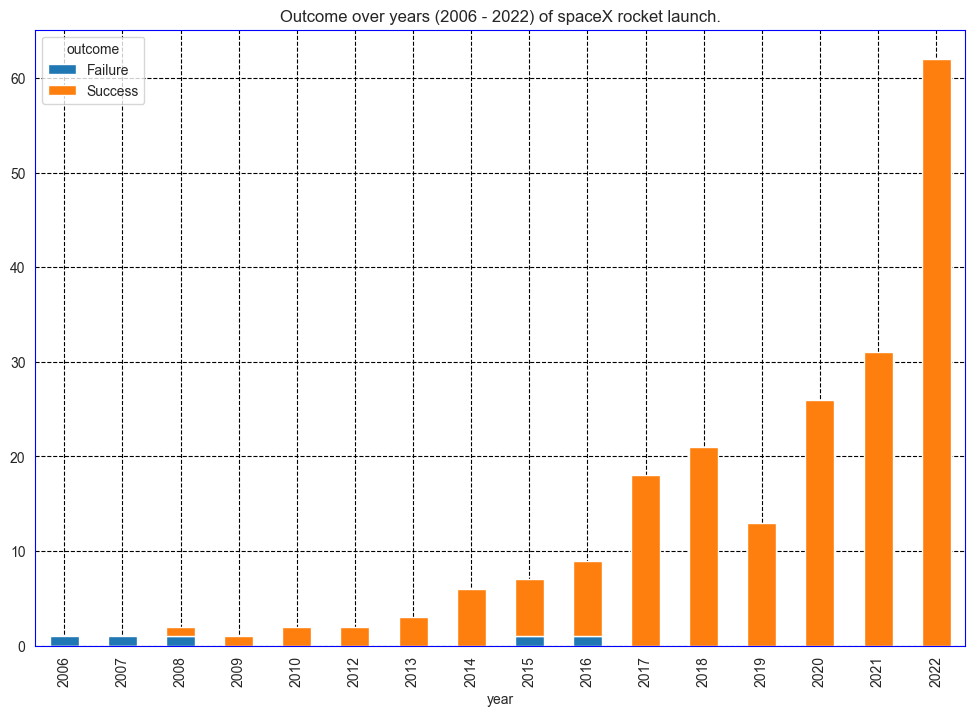

In [487]:
# Visualization
df_plot = raw_df.copy()
df_plot["year"] = raw_df['uct_time'].dt.year
df_plot = df_plot.groupby(['outcome', 'year']).size().reset_index().pivot(columns='outcome', index='year', values=0)
df_plot.plot(kind='bar', stacked=True)
plt.title("Outcome over years (2006 - 2022) of spaceX rocket launch.")
plt.show()

**TODO: Describe your observation from chart**

Biểu đồ cho thấy số vụ phóng tên lửa của *SpaceX* tăng mạnh theo thời gian. Từ năm 2006 đến 2022, số vụ phóng không ngừng gia tăng, đặc biệt sau năm 2015, tốc độ tăng trưởng trở nên rõ rệt hơn. Điều này phản ánh sự mở rộng quy mô và khả năng vận hành ngày càng hiệu quả của SpaceX.

Bên cạnh đó, tỷ lệ thành công cũng được cải thiện đáng kể. Trong những năm đầu tiên (2006-2015), có một số vụ phóng thất bại, thể hiện qua các thanh màu xanh trên biểu đồ. Tuy nhiên, từ năm 2016 trở đi, số lượng vụ thất bại giảm mạnh, và kể từ năm 2017, hầu hết các lần phóng đều thành công, minh chứng cho sự tiến bộ trong công nghệ và quy trình của SpaceX.

Đặc biệt, từ năm 2018, số vụ phóng thành công liên tục tăng, đạt mức cao nhất vào năm 2022. Việc không còn thất bại đáng kể sau năm 2017 cho thấy SpaceX đã đạt được độ tin cậy cao trong các lần phóng. Sự cải thiện này có thể đến từ những điều chỉnh trong thiết kế tên lửa, quy trình thử nghiệm, cũng như kinh nghiệm rút ra từ những lần phóng trước.

Nhìn chung, quan sát từ biểu đồ ta có thể nhìn thấy sự phát triển vượt bậc của SpaceX trong lĩnh vực phóng tên lửa. Công ty không chỉ gia tăng số lần phóng mà còn cải thiện đáng kể tỷ lệ thành công.

### Exploring numerical attributes

In [488]:
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
0,0,22.25,1.68,30146.0,NaN
1,0,22.25,1.68,30146.0,NaN
2,0,22.25,1.68,NaN,NaN
3,0,22.25,1.68,NaN,NaN
4,0,22.25,1.68,30146.0,NaN


For columns with numeric data types, you will calculate:
- Percentage (from 0 to 100) of missing values
- Min value
- Lower quantile
- Median value
- Upper quantile
- Max value

You will save the results to a DataFrame `num_col_info_df`, where:
- The names of the columns are the names of the numeric columns in `raw_df`
- Names of rows: "missing_ratio", "min", "lower_quartile", "median", "upper_quartile", "max"  

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [489]:
def missing_ratio(s):
    # YOUR CODE HERE
    return ((s.isnull().sum() / len(s)) * 100).round(1)
    # raise NotImplementedError()

def median(df):
    # YOUR CODE HERE
    return df.median().round(1)
    # raise NotImplementedError()

def lower_quartile(df):
    # YOUR CODE HERE
    return df.quantile(0.25).round(1)
    # raise NotImplementedError()

def upper_quartile(df):
    # YOUR CODE HERE
    return df.quantile(0.75).round(1)
    # raise NotImplementedError()

In [490]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,landpad
missing_ratio,0.0,29.80,29.80,29.8,100.0
min,0.0,22.25,1.68,30146.0,NaN
lower_quartile,0.0,70.00,3.70,549054.0,NaN
median,0.0,70.00,3.70,549054.0,NaN
upper_quartile,0.0,70.00,3.70,549054.0,NaN
max,2.0,70.00,12.20,1420788.0,NaN


If an attribute has missing ratio greater than 70%, you can consider to drop it from dataframe.

In [491]:
# YOUR CODE HERE
dropped_column = num_col_info_df.columns[num_col_info_df.loc["missing_ratio"] > 70]
num_col_df = num_col_df.drop(columns=dropped_column)
raw_df = raw_df.drop(columns=dropped_column)
# raise NotImplementedError()

In [492]:
# TEST
num_col_df.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
0,0,22.25,1.68,30146.0
1,0,22.25,1.68,30146.0
2,0,22.25,1.68,NaN
3,0,22.25,1.68,NaN
4,0,22.25,1.68,30146.0


In the otherwise case, you have to fill missing values. To deal with missing values, you have to perform mean fill, median fill, and mode fill. Then, you study how different they are by using the visualization of probability density function (p.d.f).

In [493]:
# YOUR CODE HERE
## Mean fill
num_col_df["mean_fill_rocket_height"] = num_col_df["rocket_height"].fillna(num_col_df["rocket_height"].mean())

# raise NotImplementedError()

In [494]:
# YOUR CODE HERE
## Median fill 
num_col_df["median_fill_rocket_height"] = num_col_df["rocket_height"].fillna(num_col_df["rocket_height"].median())

# raise NotImplementedError()

In [495]:
# YOUR CODE HERE
## Mode fill
num_col_df["mode_fill_rocket_height"] = num_col_df["rocket_height"].fillna(num_col_df["rocket_height"].mode()[0])

#raise NotImplementedError()

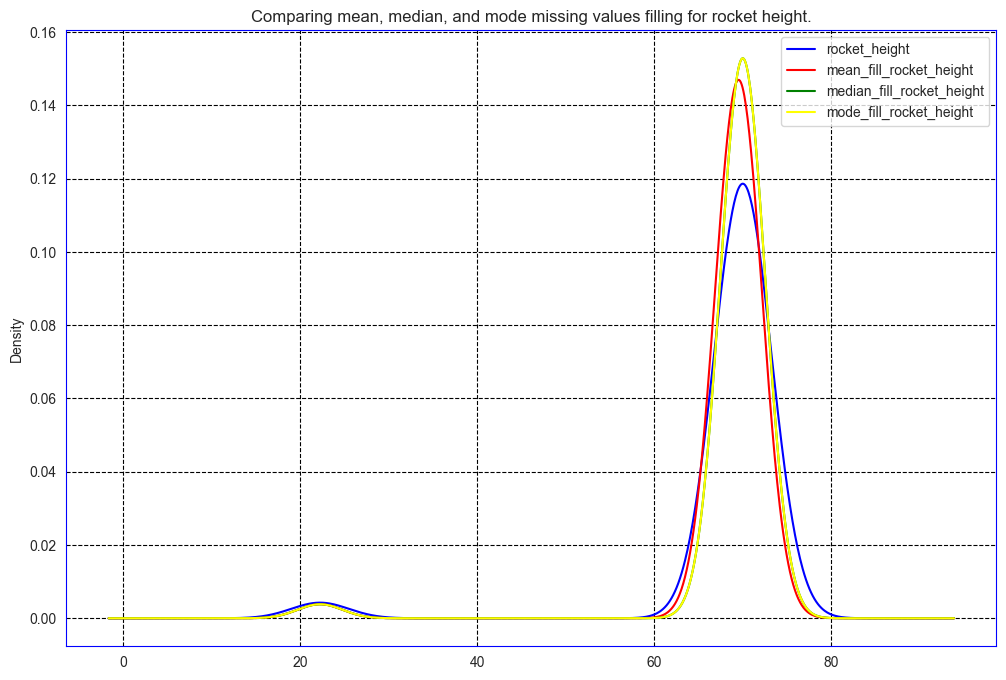

In [496]:
# Visualization for rocket_height
fig = plt.figure()
ax = fig.add_subplot(111)

num_col_df["rocket_height"] .plot(kind="kde", ax=ax, color="blue")
num_col_df["mean_fill_rocket_height"] .plot(kind="kde", ax=ax, color="red")
num_col_df["median_fill_rocket_height"] .plot(kind="kde", ax=ax, color="green")
num_col_df["mode_fill_rocket_height"] .plot(kind="kde", ax=ax, color="yellow")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')
plt.title("Comparing mean, median, and mode missing values filling for rocket height.")
plt.show()

**TODO: Describe your observation from chart**

Biểu đồ so sánh phân bố của dữ liệu gốc về chiều cao tên lửa với ba phương pháp điền giá trị thiếu: trung bình (mean), trung vị (median) và mode.  

Nhìn vào biểu đồ, ta thấy rằng dữ liệu gốc (đường màu xanh dương) có một phân bố tập trung chủ yếu quanh một khoảng giá trị nhất định. Khi điền giá trị thiếu bằng trung bình (đường màu đỏ), trung vị (đường màu xanh lá) và mode (đường màu vàng), các đường phân bố mới không có sự khác biệt đáng kể so với dữ liệu gốc. Điều này cho thấy ba phương pháp điền giá trị thiếu này không làm thay đổi đáng kể hình dạng phân bố của dữ liệu.  

Tuy nhiên, đường phân bố của phương pháp điền bằng trung vị và mode có xu hướng nhọn hơn một chút so với phương pháp trung bình, cho thấy mức độ tập trung dữ liệu cao hơn. Trong khi đó, phương pháp trung bình có xu hướng làm dữ liệu phân tán hơn một chút so với hai phương pháp còn lại.  

Tóm lại, tất cả các phương pháp điền giá trị thiếu đều giữ nguyên được cấu trúc phân bố dữ liệu, nhưng tùy vào mục đích phân tích cụ thể, có thể lựa chọn phương pháp phù hợp để đảm bảo tính đại diện tốt nhất cho dữ liệu gốc.

**Before choosing one of them to fill in your `raw_df`**, do you realize an abnomal in `rocket_height` attribute?

**TODO:** Read metadata again, check `rocket_name`, find the way to fill missing value for `rocket_height`.

In [497]:
# YOUR CODE HERE
## Recheck: find unique elements in `rocket_name`
raw_df["rocket_name"].unique()

## Check the maximum and minimum height values for each rocket
def checking_range(rocket_name: str) -> tuple[float, float]:
    """Checking range of height for a given rocket name

    Args:
        rocket_name (str): the name of rocket

    Returns:
        tuple[float, float]: the range, min-max.
    """
    

    rocket_data = raw_df[raw_df["rocket_name"] == rocket_name]["rocket_height"]
    return (rocket_data.min(), rocket_data.max())
    
    # raise NotImplementedError()

In [498]:
# Perform checking for Falcon 1
assert adler32(str(checking_range(rocket_name="Falcon 1")[0] + checking_range(rocket_name="Falcon 1")[1]).encode()) == 33620172

In [499]:
# Perform checking for Falcon 9
assert adler32(str(checking_range(rocket_name="Falcon 9")[0] + checking_range(rocket_name="Falcon 9")[1]).encode()) == 48627956

In [500]:
# Perform checking for Falcon Heavy
assert adler32(str(checking_range(rocket_name="Falcon Heavy")[0] * checking_range(rocket_name="Falcon Heavy")[1]).encode()) == 70713644

And now, you should fill missing values with a specific value. 

In [501]:
# TODO:
# YOUR CODE HERE
def fill_rocketheight(df: pd.DataFrame) -> pd.DataFrame:
    cp_df = df.copy()
    
    cp_df['rocket_height'] = cp_df['rocket_height'].fillna(cp_df['rocket_height'].median())
    #raise NotImplementedError()
    return cp_df

raw_df = fill_rocketheight(raw_df)

Choose one of ways (mean fill, median fill) to fill missing values for the remain columns (`rocket_diameter`, and `rocket_mass`)

In [502]:
# YOUR CODE HERE
raw_df["rocket_diameter"] = raw_df["rocket_diameter"].fillna(raw_df["rocket_diameter"].mean())
raw_df["rocket_mass"] = raw_df["rocket_mass"].fillna(raw_df["rocket_mass"].mean())
# raise NotImplementedError()

In [503]:
# TEST
num_col_df = raw_df.select_dtypes(exclude=['object', 'datetime64','datetime64[ns, UTC]'])
num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass
missing_ratio,0.0,0.00,0.00,0.0
min,0.0,22.25,1.68,30146.0
lower_quartile,0.0,70.00,3.70,549054.0
median,0.0,70.00,3.70,549054.0
upper_quartile,0.0,70.00,3.80,556404.5
max,2.0,70.00,12.20,1420788.0


In [504]:
# TEST
num_col_info_df = num_col_df.agg([missing_ratio, "min", lower_quartile, median, upper_quartile, "max"])
assert num_col_info_df.shape == (6, 4)

data = num_col_info_df.loc[['missing_ratio', 'min', 'lower_quartile', 'median', 'upper_quartile', 'max'],
                           ['rocket_boosters', 'rocket_height', 'rocket_diameter', 'rocket_mass']].values

# print(adler32(str(data).encode()))
assert adler32(str(data).encode()) == 1580417893

**TODO** What type of each numerical attribute? Continous?  variable?

Các thuộc tính số trong tập dữ liệu bao gồm `rocket_boosters`, `rocket_height`, `rocket_diameter`, và `rocket_mass` đều làbiến liên tục vì chúng đại diện cho các giá trị có thể nhận bất kỳ số thực nào trong một khoảng nhất định: `rocket_boosters` dao động từ 0 đến 2, `rocket_height` từ 22.25 đến 70.0, `rocket_diameter` từ 1.68 đến 12.20, và `rocket_mass` từ 30146.0 đến 1420788.0, như được hiển thị trong bảng thống kê. Các giá trị này không bị giới hạn ở các mức rời rạc mà có thể nhận các giá trị thập phân (ví dụ: 22.25 cho `rocket_height` hoặc 1.68 cho `rocket_diameter`), và chúng phản ánh các đặc tính vật lý của tên lửa (số lượng động cơ đẩy, chiều cao, đường kính, khối lượng), vốn là các đại lượng liên tục trong thực tế. 

Do đó, tất cả các thuộc tính này đều thuộc kiểu biến liên tục.

### Exploring non-numerical attributes

In [505]:
cate_col_df = raw_df.select_dtypes(include=['object'])
cate_col_df.head()

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
0,FalconSat,"[{'type': 'Satellite', 'mass': 20, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
1,DemoSat,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
2,Trailblazer,"[{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit...",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Failure
3,RatSat,"[{'type': 'Satellite', 'mass': 165, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success
4,RazakSat,"[{'type': 'Satellite', 'mass': 200, 'orbit': 'LEO'}]",Falcon 1,Kwajalein Atoll,Marshall Islands,"(9.0477206, 167.7431292)",NaN,NaN,NaN,"(nan, nan)",Success


In [506]:
def str2dict(s: str) -> List[Dict]:
    """Convert given string to dict
    
    Example:
        - Input string: [{'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}]
        - Output: ({'type': 'Satellite', 'mass': None, 'orbit': 'LEO'}, {'type': 'Satellite', 'mass': None, 'orbit': 'LEO'})


    Args:
        s (str): _description_
        
    Return:
        list(dict):
    """
    # TODO:
    # YOUR CODE HERE
    if isinstance(s, str):
        try:
            return eval(s)
        except:
            return []
    return s
    # raise NotImplementedError()

Series and DataFrame methods define a .explode() method that explodes lists into separate rows. You should use this method to explode the `payloads` attribute and convert this column to `str`

In [507]:
# TODO:
# YOUR CODE HERE
cate_col_df["payloads"] = cate_col_df["payloads"].apply(str2dict)
cate_col_df = cate_col_df.explode("payloads")
# raise NotImplementedError()

For columns with non-numeric data types, you calculate:
- Percentage (from 0 to 100) of missing values
- Number of values (the values here are different values and we do not consider missing values): with columns whose type is categorical, it is a set with a finite number of categories. Directly counting the number of values in these columns doesn't make much sense, so it's better to count the number of elements of all types.
- The percentage (from 0 to 100) of each value is sorted by decreasing percentage (we do not consider missing values, the ratio is the ratio compared to the number of non-missing values): you use a dictionary to store , key is the value, value is the percentage; With the column corresponding to each type, the method is similar to above.

You will save the results to DataFrame `cat_col_info_df`, where:
- The names of the columns are the names of the non-numeric columns in `raw_df`
- The names of the lines are: "missing_ratio", "num_values", "value_ratios"

For ease of viewing, you round all values to 1 decimal place using the `.round(1)` method.

In [508]:
def missing_ratio(s):
    # TODO:
    # YOUR CODE HERE
    #raise NotImplementedError()
    return (s.isnull().mean() * 100).round(1)

def num_values(s):
    # TODO:
    # YOUR CODE HERE
    #raise NotImplementedError()
    return s.apply(lambda x: frozenset(x.items()) if isinstance(x, dict) else x).nunique()

def value_ratios(s):
    # TODO:
    # YOUR CODE HERE
    #raise NotImplementedError()
    value_counts = s.dropna().value_counts(normalize=True) * 100
    return {str(k): v for k, v in value_counts.round(1).items()}

cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,1.4,0.0,0.0,0.0,0.0,27.3,23.9,47.4,0.0,0.0
num_values,205,146,3,4,3,4,6,3,2,5,2
value_ratios,"{'Trailblazer': 1.0, 'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.0, 'COTS 1': 1.0, 'CRS-...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 11.7, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 94.7, 'Falcon 1': 2.9, 'Falcon Heavy': 2.4}","{'CCSFS SLC 40': 55.0, 'KSC LC 39A': 27.8, 'VAFB SLC 4E': 14.4, 'Kwajalein Atoll': 2.9}","{'Florida': 82.8, 'California': 14.4, 'Marshall Islands': 2.9}","{'(28.5618571, -80.577366)': 55.0, '(28.6080585, -80.6039558)': 27.8, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 40.7, '(nan, nan)': 27.3, '(28.4104, -80.6188)': 20.6, '(28.485833...","{'Success': 97.1, 'Failure': 2.9}"


In [509]:
# TEST
c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33554635
assert adler32(str(c.loc['num_values']).encode()) == 3604535

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 33161421
assert adler32(str(c.loc['num_values']).encode()) == 3407924

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 34144462
assert adler32(str(c.loc['num_values']).encode()) == 3342387

And now, we will fill in the missing value for these non-attributes. You make a list of attributes that need to be filled in here.
- `landpad_name`
- `landpad_type`
- `landpad_region`

Considering the missing ratio, should we delete these attribute columns?

Dựa trên bảng thông tin cat_col_info_df, các cột `landpad_name`, `landpad_type`, và `landpad_region` có tỷ lệ giá trị thiếu lần lượt là 27.3%, 23.9%, và 47.4%. Việc xóa các cột này không nên thực hiện ngay lập tức, vì tỷ lệ giá trị thiếu tuy cao (đặc biệt với `landpad_region` gần 50%) nhưng vẫn có thể xử lý bằng các phương pháp điền giá trị thiếu thay vì xóa, để tránh mất thông tin quan trọng. Ta nên thử các phương pháp điền giá trị thiếu trước, và chỉ xóa nếu sau khi điền, các cột này không còn giá trị phân tích hoặc làm giảm chất lượng mô hình.

Next, you have to check `landpad_name`, `landpad_type`, and `landpad_region`. If these values are ALL NAN, you should these row from your `cate_col_df`.

In [510]:
# TODO:
# YOUR CODE HERE
cate_col_df = cate_col_df.dropna(subset=["landpad_name", "landpad_type", "landpad_region"], how="all")
# raise NotImplementedError()

In [511]:
# TEST
cate_col_df[cate_col_df["landpad_name"].isnull() & cate_col_df["landpad_type"].isnull() & cate_col_df["landpad_region"].isnull()]

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome


In [512]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,4.4,0.0,30.8,0.0,0.0
num_values,158,110,2,3,2,3,6,3,2,5,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CASSIOPE': 0.6, 'DART': 0.6, 'GPS III S...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.1, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.1, 'Falcon Heavy': 1.9}","{'CCSFS SLC 40': 52.2, 'KSC LC 39A': 32.1, 'VAFB SLC 4E': 15.7}","{'Florida': 84.3, 'California': 15.7}","{'(28.5618571, -80.577366)': 52.2, '(28.6080585, -80.6039558)': 32.1, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 80.5, 'RTLS': 15.1, 'Ocean': 4.4}","{'Florida': 53.6, 'California': 46.4}","{'(33.7291858, -118.262015)': 53.5, '(28.4104, -80.6188)': 27.0, '(28.485833, -80.544444)': 11.3...","{'Success': 98.7, 'Failure': 1.3}"


**Question** Considering the Falcon 1 rockets, what are the names, types, and regions of their landpad? Comparing their names of launch pad and launch region. Similarly, you check for Falcon 9 and Falcon Heavy rockets, give your observation, and fill in the missing value with some specific values.

*Hint*: It can be said that the region of the landing pad and launch pad are the same.

By Googling, you can find something interesting about the region of each landpad. Please fill the table below:

TODO: Complete the table below.

| Landpad  | Type  |  Region |
|---|---|---|
| OCISLY  | ASDS  |  *California |
| JRTI  | ASDS  | Florida  |
| ASOG  | *ASDS  |  Port Canaveral, Florida  |
| LZ-1  |  RTLS | *Florida |
| LZ-4  | *RTLS  | California  |
| JRTI-1  | *ASDS   | *Florida   |

**Observation 1**: 
- Falcon 9 rockets which have launchpad in Florida and have landpad in Florida that have no missing values. 
- Falcon 9 rockets which have launchpad in Florida and have landpad in California that have no missing values. Their land name and type are OCISLY and ASDS, respectively.

TODO: What are the further rules you can find?

Nếu `landpad_name` là *LZ-1* hoặc *LZ-4* (loại *RTLS*), thì `landpad_region` sẽ trùng với `launchpad_region` (*Florida* hoặc *California*).

**Observation 2**
- Falcon 9 rockets which have landpad name is `OCISLY`, and landpad type is `ASDS` => landpad region `California`
- Falcon 9 rockets which have landpad name is `JRTI`, and landpad type is `ASDS` => landpad region `Florida`
- Falcon 9 rockets which have landpad name is `ASOG`, and landpad type is `ASDS` => landpad region `Florida`

TODO: What are the further rules you can find?

Các lần hạ cánh của *Falcon 9* trên ASDS tuân theo quy tắc: *OCISLY* ứng với *California*, *JRTI* hoặc *ASOG* thì ứng với *Florida*.

In [513]:
def fill_landpadregion(df: pd.DataFrame) -> pd.DataFrame:
    """Fill missing value in landpad region in the input dataframe.

    Args:
        df (pd.DataFrame): input dataframe

    Returns:
        pd.DataFrame: output dataframe
    """
    # YOUR CODE HERE
    # raise NotImplementedError()
    if (df is None):
        raise ValueError
    
    # Create a copy of the dataframe to avoid changing the original
    df_cp = df.copy()
    
    df_cp = df_cp.reset_index(drop=True)
    
    df_cp.loc[(df_cp['landpad_name'] == 'OCISLY') & (df_cp['landpad_type'] == 'ASDS'), 'landpad_region'] = 'California'
    df_cp.loc[(df_cp['landpad_name'] == 'JRTI') & (df_cp['landpad_type'] == 'ASDS'), 'landpad_region'] = 'Florida'
    df_cp.loc[(df_cp['landpad_name'] == 'ASOG') & (df_cp['landpad_type'] == 'ASDS'), 'landpad_region'] = 'Florida'
    df_cp.loc[(df_cp['landpad_name'] == 'LZ-1') & (df_cp['landpad_type'] == 'RTLS'), 'landpad_region'] = 'Florida'
    df_cp.loc[(df_cp['landpad_name'] == 'LZ-4') & (df_cp['landpad_type'] == 'RTLS'), 'landpad_region'] = 'California'
    df_cp.loc[(df_cp['landpad_name'] == 'JRTI-1') & (df_cp['landpad_type'] == 'ASDS'), 'landpad_region'] = 'Florida'
    df_cp.loc[df_cp['landpad_region'].isnull(), 'landpad_region'] = df_cp['launchpad_region']

    df_cp = df_cp[df_cp['landpad_type'] != 'Ocean']
    
    return df_cp

# Apply the function to cate_col_df
cate_col_df = fill_landpadregion(cate_col_df)

In [514]:
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])
cat_col_info_df

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


In [515]:
# TEST
cat_col_info_df = cate_col_df.agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['landpad_name']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3604535
assert adler32(str(c.loc['value_ratios']['LZ-1']).encode()) == 32440521

c = cat_col_info_df['landpad_type']
assert adler32(str(c.loc['missing_ratio']).encode())  == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['RTLS']).encode()) == 33226957

c = cat_col_info_df['landpad_region']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3342387
assert adler32(str(c.loc['value_ratios']['California']).encode()) ==  33751242

TODO: Fill missing values for all `raw_df`

In [516]:
raw_df["payloads"] = raw_df["payloads"].apply(str2dict)

# YOUR CODE HERE
del_idx = list(set(raw_df.index) - set(cate_col_df.index))

raw_df = raw_df.drop(index=del_idx).reset_index(drop=True)
num_col_df = num_col_df.drop(index=del_idx).reset_index(drop=True)
cate_col_df = cate_col_df.reset_index(drop=True)

raw_df.update(cate_col_df)
raw_df.update(num_col_df)

# raise NotImplementedError()

In [517]:
# TEST 01
assert raw_df.shape == (152, 16)

In [518]:
# TEST 02
raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

,launch_name,payloads,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
num_values,151,104,2,3,2,3,6,2,2,4,2
value_ratios,"{'Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM': 1.3, 'CRS-5': 0.7, 'Starlink 4-4 (v1.5)': 0.7...","{'{'type': 'Satellite', 'mass': 15600, 'orbit': 'VLEO'}': 15.8, '{'type': 'Satellite', 'mass': 1...","{'Falcon 9': 98.0, 'Falcon Heavy': 2.0}","{'CCSFS SLC 40': 51.3, 'KSC LC 39A': 33.6, 'VAFB SLC 4E': 15.1}","{'Florida': 84.9, 'California': 15.1}","{'(28.5618571, -80.577366)': 51.3, '(28.6080585, -80.6039558)': 33.6, '(34.632093, -120.610829)'...","{'OCISLY': 42.1, 'JRTI': 27.0, 'ASOG': 13.8, 'LZ-1': 11.8, 'LZ-4': 3.9, 'JRTI-1': 1.3}","{'ASDS': 84.2, 'RTLS': 15.8}","{'Florida': 53.9, 'California': 46.1}","{'(33.7291858, -118.262015)': 55.9, '(28.4104, -80.6188)': 28.3, '(28.485833, -80.544444)': 11.8...","{'Success': 98.7, 'Failure': 1.3}"


Consider the `payloads` attributes; you have to check whether they have missing values.

In [519]:
cate_col_df2 = cate_col_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)  
cate_col_df2

,launch_name,rocket_name,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,type,mass,orbit
0,CRS-5,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,CRS-6,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,CRS-7,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,OG-2 Mission 2,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,Jason 3,Falcon 9,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO
...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,180.0,VLEO
148,Starlink 4-2 (v1.5) & Blue Walker 3,Falcon 9,KSC LC 39A,Florida,"(28.6080585, -80.6039558)",ASOG,ASDS,Florida,"(33.7291858, -118.262015)",Success,Satellite,14760.0,VLEO
149,Starlink 4-34 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,16100.0,VLEO
150,Starlink 4-35 (v1.5),Falcon 9,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,13260.0,VLEO


Next, you have to missing values for three columns: `type`, `mass`, and `orbit`.

- Step 01: Drop all rows that have NaN values for all three columns or any two columns.

In [520]:
# YOUR CODE HERE
# raw_df = raw_df.dropna(subset=["type", "mass", "orbit"], how="all")
# raw_df = raw_df.dropna(thresh=2, subset=["type", "mass", "orbit"])

col_to_check = ["type", "mass", "orbit"]
num_missing = cate_col_df2[col_to_check].isnull().sum(axis=1)
cate_col_df2 = cate_col_df2[num_missing < 2].reset_index(drop=True)
# cate_col_df2 = cate_col_df2.dropna(subset=["type", "mass", "orbit"], how="all")

# # Chỉ cần 2 trong 3 cột có giá trị NAN cũng drop luôn
# cate_col_df2 = cate_col_df2.dropna(thresh=2, subset=["type", "mass", "orbit"])
# raise NotImplementedError()

- Step 02: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes. For more convenience, you should save these rows which have `None` mass values to file named as `unknow_mass_spaceX_launch.csv`

In [521]:
cate_col_df2.columns

Index(['launch_name', 'rocket_name', 'launchpad_name', 'launchpad_region',
       'launchpad_geo', 'landpad_name', 'landpad_type', 'landpad_region',
       'landpad_geo', 'outcome', 'type', 'mass', 'orbit'],
      dtype='object')

In [522]:
# YOUR CODE HERE
drop_idx = cate_col_df2[cate_col_df2["mass"].isna()].index.tolist()
# raise NotImplementedError()

In [523]:
cate_col_df2[cate_col_df2["mass"].isnull()].to_csv("./data/unknow_mass_spaceX_launch.csv", index=False)

In [524]:
cate_col_df2.drop(drop_idx, inplace=True)

In [525]:
# TEST
cat_col_info_df2 = cate_col_df2.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df2['type']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df2['mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df2['orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

- Step 03: Apply for `raw_df`

In [526]:
# Step 01: unpack `payloads`
# YOUR CODE HERE
#raw_df = raw_df.explode("payloads")
raw_df = raw_df.join(pd.DataFrame(cate_col_df['payloads'].tolist())).drop('payloads', axis=1)
# raise NotImplementedError()

In [527]:
# Step 02: rename columns `type`, `mass`, and `orbit` to `payloads_type`, `payloads_mass`, and `payloads_orbit`
# YOUR CODE HERE
raw_df.rename(columns={"type": "payloads_type", "mass": "payloads_mass", "orbit": "payloads_orbit"}, inplace=True)
# raise NotImplementedError()

In [528]:
# Step 03: drop all rows that have NaN values for all three columns or any two columns.
# YOUR CODE HERE
check = ["payloads_type", "payloads_mass", "payloads_orbit"]
num_missing = raw_df[check].isnull().sum(axis=1)
raw_df = raw_df[num_missing < 2].reset_index(drop=True)
# raw_df = raw_df.dropna(thresh=2, subset=["payloads_type", "payloads_mass", "payloads_orbit"])
# aise NotImplementedError()

In [529]:
# Step 04: Filling missing values for `cate_col_df2` by dropping `None` values from mass attributes
# YOUR CODE HERE
raw_df = raw_df.dropna(subset=["payloads_mass"])
# raise NotImplementedError()

In [530]:
# TEST
cat_col_info_df = raw_df.select_dtypes(include=['object']).agg([missing_ratio, num_values, value_ratios])

c = cat_col_info_df['payloads_type']
    
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 3473461
# assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34734285
assert adler32(str(c.loc['value_ratios']['Satellite']).encode()) == 34209997

# Due to mass should be numerical data type, so this check will be disable
# c = cat_col_info_df['payloads_mass']
# assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
# # assert adler32(str(c.loc['num_values']).encode()) == 10748012
# assert adler32(str(c.loc['num_values']).encode()) == 11141232
# # assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19595417
# assert adler32(str(c.loc['value_ratios']['9600']).encode()) == 19726487

c = cat_col_info_df['payloads_orbit']
assert adler32(str(c.loc['missing_ratio']).encode()) == 18808975
assert adler32(str(c.loc['num_values']).encode()) == 9764963
assert adler32(str(c.loc['value_ratios']['LEO']).encode()) ==  20185242

In [531]:
# TEST
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,launchpad_geo,landpad_name,landpad_type,landpad_region,landpad_geo,outcome,payloads_type,payloads_mass,payloads_orbit
0,2009-07-13 03:35:00+00:00,CRS-5,Falcon 9,0,22.25,1.680000,30146.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,2395.0,ISS
1,2010-12-08 15:43:00+00:00,CRS-6,Falcon 9,0,70.00,3.806944,556404.541667,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",JRTI-1,ASDS,Florida,"(28.4104, -80.6188)",Success,Dragon 1.1,1898.0,ISS
2,2012-05-22 07:44:00+00:00,CRS-7,Falcon 9,0,70.00,3.806944,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",OCISLY,ASDS,California,"(33.7291858, -118.262015)",Failure,Dragon 1.1,1952.0,ISS
3,2012-10-08 00:35:00+00:00,OG-2 Mission 2,Falcon 9,0,70.00,3.700000,549054.000000,CCSFS SLC 40,Florida,"(28.5618571, -80.577366)",LZ-1,RTLS,Florida,"(28.485833, -80.544444)",Success,Satellite,2034.0,LEO
4,2013-03-01 19:10:00+00:00,Jason 3,Falcon 9,0,70.00,3.700000,556404.541667,VAFB SLC 4E,California,"(34.632093, -120.610829)",JRTI,ASDS,Florida,"(28.4104, -80.6188)",Success,Satellite,553.0,PO


Next, you have to unpack `launchpad_geo` and `landpad_geo` to xy coordinates. **Remember**: drop `launchpad_geo` and `landpad_geo` after unpack.

In [532]:
def str2tuple(s: str) -> tuple:
    # YOUR CODE HERE
    return tuple(map(float, s.strip("()").split(",")))
    # raise NotImplementedError()

In [533]:
# Apply str2tuple
raw_df["launchpad_geo"] = raw_df["launchpad_geo"].apply(str2tuple)
raw_df["landpad_geo"] = raw_df["landpad_geo"].apply(str2tuple)

In [534]:
# Unpack
raw_df[['launchpad_geo_x', 'launchpad_geo_y']] = pd.DataFrame(raw_df['launchpad_geo'].tolist(), index=raw_df.index)
raw_df[['landpad_geo_x', 'landpad_geo_y']] = pd.DataFrame(raw_df['landpad_geo'].tolist(), index=raw_df.index)

In [535]:
raw_df = raw_df.drop(["launchpad_geo", "landpad_geo"], axis=1)
raw_df.head()

,uct_time,launch_name,rocket_name,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,launchpad_name,launchpad_region,landpad_name,landpad_type,landpad_region,outcome,payloads_type,payloads_mass,payloads_orbit,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y
0,2009-07-13 03:35:00+00:00,CRS-5,Falcon 9,0,22.25,1.680000,30146.000000,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,2395.0,ISS,28.561857,-80.577366,28.410400,-80.618800
1,2010-12-08 15:43:00+00:00,CRS-6,Falcon 9,0,70.00,3.806944,556404.541667,CCSFS SLC 40,Florida,JRTI-1,ASDS,Florida,Success,Dragon 1.1,1898.0,ISS,28.561857,-80.577366,28.410400,-80.618800
2,2012-05-22 07:44:00+00:00,CRS-7,Falcon 9,0,70.00,3.806944,549054.000000,CCSFS SLC 40,Florida,OCISLY,ASDS,California,Failure,Dragon 1.1,1952.0,ISS,28.561857,-80.577366,33.729186,-118.262015
3,2012-10-08 00:35:00+00:00,OG-2 Mission 2,Falcon 9,0,70.00,3.700000,549054.000000,CCSFS SLC 40,Florida,LZ-1,RTLS,Florida,Success,Satellite,2034.0,LEO,28.561857,-80.577366,28.485833,-80.544444
4,2013-03-01 19:10:00+00:00,Jason 3,Falcon 9,0,70.00,3.700000,556404.541667,VAFB SLC 4E,California,JRTI,ASDS,Florida,Success,Satellite,553.0,PO,34.632093,-120.610829,28.410400,-80.618800


## Encoding categorical (2 pts)

In this section, you have to encode your attributes, which have a categorical type. To choose the right encoding method, you have to decide if a given attribute is `ordinal` or `nominal`. For `nominal` attributes, you should use `one hot encoding`, and for `ordinal` attributes, you should use `label encoding`.

Step 01: `launch_name` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal`, do `launch_name` (tên vụ phóng) thường là tên riêng và khác nhau. Các tên này không có thứ tự hay quy luật nào giữa chúng (ví dụ: không thể nói "CRS 7" cao hơn "CRS 6" theo kiểu so sánh thông thường). Do đó, đây là thuộc tính `nominal`.

In [536]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["launch_name"], prefix="launch_name")
# raise NotImplementedError()

Step 02: `rocket_name` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `rocket_name` (tên của tên lửa) đại diện cho các tên gọi hoặc mẫu tên lửa khác nhau. Không có thứ tự nào giữa tên các tên lửa này. Vì vậy, đây là thuộc tính `nominal`. 

In [537]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["rocket_name"], prefix="rocket_name")
# raise NotImplementedError()

Step 03: `launchpad_name` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `launchpad_name` (tên của bệ phóng) đại diện cho các tên gọi của những bệ phóng tên lửa khác nhau. Không có thứ tự nào giữa các tên bệ phóng tên lửa này. Vì vậy, đây là thuộc tính `nominal`. 

In [538]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["launchpad_name"], prefix="launchpad_name")
# raise NotImplementedError()

Step 04: `launchpad_region` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `launchpad_region` (vùng bệ phóng) đại diện cho tên gọi các vùng bệ phóng tên lửa khác nhau. Không có thứ tự nào giữa các vùng bệ phóng tên lửa này. Vì vậy, đây là thuộc tính `nominal`. 

In [539]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["launchpad_region"], prefix="launchpad_region")
# raise NotImplementedError()

Step 05: `landpad_name` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `landpad_name` (tên của bãi đáp) đại diện cho các tên gọi của những bãi đáp tên lửa khác nhau. Không có thứ tự nào giữa các tên bãi đáp tên lửa này. Vì vậy, đây là thuộc tính `nominal`. 

In [540]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["landpad_name"], prefix="landpad_name")
# raise NotImplementedError()

Step 06: `landpad_type` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `landpad_type` (loại bãi đáp) đại diện cho các loại bãi đáp tên lửa khác nhau. Không có thứ tự nào giữa những loại bãi đáp tên lửa này. Vì vậy, đây là thuộc tính `nominal`. 

In [541]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["landpad_type"], prefix="landpad_type")
# raise NotImplementedError()

Step 07: `landpad_region` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `landpad_region` (vùng bãi đáp) đại diện cho tên các vùng của những bãi đáp tên lửa khác nhau. Không có thứ tự nào giữa các tên vùng này. Vì vậy, đây là thuộc tính `nominal`. 

In [542]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["landpad_region"], prefix="landpad_region")
# raise NotImplementedError()

Step 08: `outcome` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Ordinal` vì `outcome` (kết quả) như *Failure* (thất bại) hay *Success* (thành công) có thứ tự hơn: thất bại < thành công. Do đây là thuộc tính `ordinal`, phương pháp `label encoding` sẽ được sử dụng.

In [543]:
# YOUR CODE HERE
le = LabelEncoder()
raw_df["outcome"] = le.fit_transform(raw_df["outcome"])
# raise NotImplementedError()

Step 09: `payloads_type` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `payloads_type` (loại tải trọng) là các dạng hàng hóa, đồ vật khác nhau. Không có thứ tự hay khả năng so sánh những loại hàng này nên đây là loại dữ liệu `nominal`.

In [544]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["payloads_type"], prefix="payloads_type")
# raise NotImplementedError()

Step 10: `payloads_orbit` checking, is this `ordinal` or `nominal`?

Đây là loại dữ liệu `Nominal` vì `payloads_orbit` (quỹ đạo hàng) như "LEO" (quỹ đạo thấp), "ISS" (quỹ đạo theo ISS - Trạm Vũ trụ quốc tế), ... là các loại quỹ đạo khác nhau. Mặc dù chúng khác nhau về độ cao, nhưng dựa vào tên thì không thể so sánh hay xếp hạng chúng. Do đó đây là loại dữ liệu `nominal`.

In [545]:
# YOUR CODE HERE
raw_df = pd.get_dummies(raw_df, columns=["payloads_orbit"], prefix="payloads_orbit").astype(np.int64)
# raise NotImplementedError()

In [546]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,l

After encoding for categorical columns, you check again data types, are there any columns whose data types are not suitable for further processing?

In [547]:
# YOUR CODE HERE
raw_df["payloads_mass"] = raw_df["payloads_mass"].astype(float)
# raise NotImplementedError()

TODO: Find different methods to encode categorical attributes.

Để mã hóa các thuộc tính phân loại trong tập dữ liệu, ngoài *one-hot encoding* và *label encoding*, có thể áp dụng nhiều phương pháp khác như: *Binary Encoding* chuyển danh mục thành nhị phân để giảm số cột, phù hợp với các cột nominal như `launchpad_name`; *Target Encoding* thay thế danh mục bằng giá trị trung bình của biến mục tiêu, hữu ích cho `launchpad_region` trong học máy có giám sát; *Ordinal Encoding* gán số nguyên theo thứ tự thủ công, lý tưởng cho cột ordinal như `outcome` hay *Frequency Encoding* sử dụng tần suất xuất hiện của danh mục, áp dụng cho `rocket_name`. Mỗi phương pháp đều có ưu, nhược điểm riêng, tùy thuộc vào đặc điểm dữ liệu và mục tiêu bài toán.

## Discretization techniques (2 pts)

Let's first see about your filled data.

In [548]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,l

### Equal Width Discretization

Fixed-width discretization is one common type of discretization approach in which the width or size of all the intervals remains the same. Equal-width discretization is a type of unsupervised discretization technique.

We will only perform discretization on the `payloads_mass` column. Let’s first plot a histogram for it.

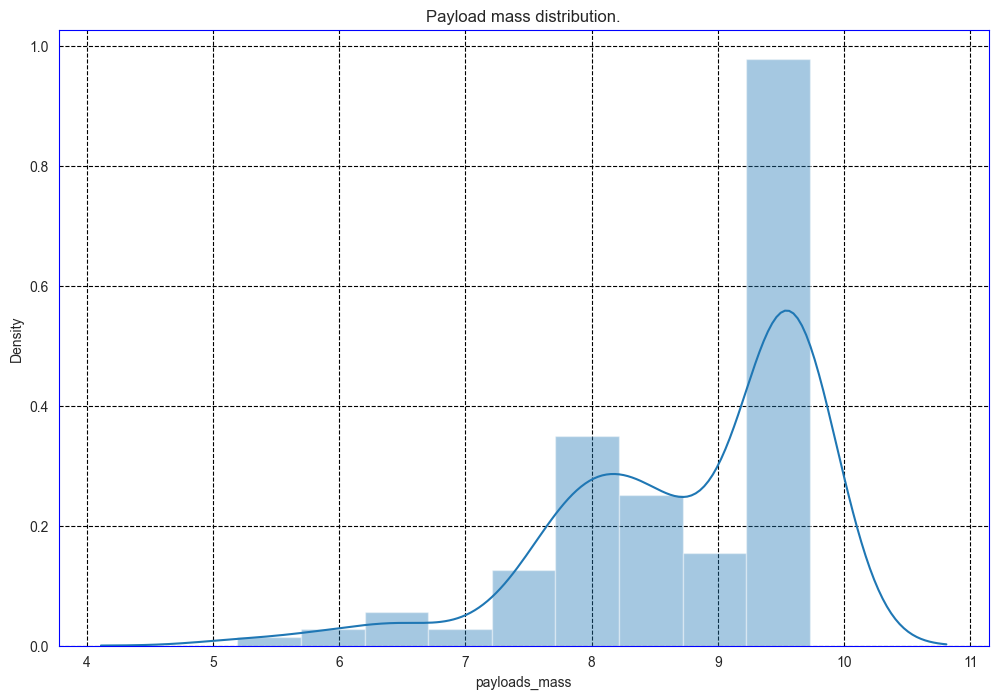

In [549]:
sns.distplot(np.log(raw_df['payloads_mass']))
plt.title("Payload mass distribution.")
plt.show()

The histogram for the price column shows that our dataset is negatively skewed. We can use discretization on this type of data distribution.

- Step 01: Find the total payloads mass range by subtracting the minimum mass from the maximum mass.

In [550]:
# YOUR CODE HERE
mass_range = raw_df['payloads_mass'].max() - raw_df['payloads_mass'].min()
# raise NotImplementedError()
# mass_range = ?

In [551]:
# TEST
assert adler32(str(mass_range).encode()) == 94306658

- Step 02: Calculate the upper and upper bound for payloads

*Hint*: The minimum payloads will be rounded off to floor, while the maximum payloads will be rounded off to ceil.

In [552]:
# YOUR CODE HERE
import math 

lower_interval = math.floor(raw_df['payloads_mass'].min())
upper_interval = math.ceil(raw_df['payloads_mass'].max())
# raise NotImplementedError()
# lower_interval =?
# upper_interval =?

In [553]:
# TEST
assert adler32(str(lower_interval).encode()) == 20316314
assert adler32(str(upper_interval).encode()) == 52297997

- Step 3: Set up bins for visualization. We will make **4 bins** (you can understand why we need 4 bins by experimenting with 4 to 10 bins or the equation below). To generate bins, we will begin with the minimum value and then add the bin interval or length to it. To calculate the second interval, add the interval length to the upper limit of the first interval, and so on.

$$
\text{no\_of\_bins} = \dfrac{\max - \min}{h} = \dfrac{\max - \min}{2 * IQR * n^{-1/3}} = \dfrac{\max - \min}{2 * (Q3 - Q2) * n^{-1/3}}
$$

In [554]:
# YOUR CODE HERE
interval_size = (upper_interval - lower_interval) / 4
total_bins = [lower_interval + i * interval_size for i in range(5)]
# raise NotImplementedError()
# interval_size =?
# total_bins =?

And you should give a label for each bin such as `bin_no_1`, `bin_no_2`, etc.

In [555]:
# YOUR CODE HERE
bin_labels = [f'bin_no_{i+1}' for i in range(4)]
# raise NotImplementedError()

And maybe you want to use the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [556]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(
    raw_df['payloads_mass'],
    bins=total_bins,
    labels=bin_labels,
    include_lowest=True
)

# raise NotImplementedError()

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

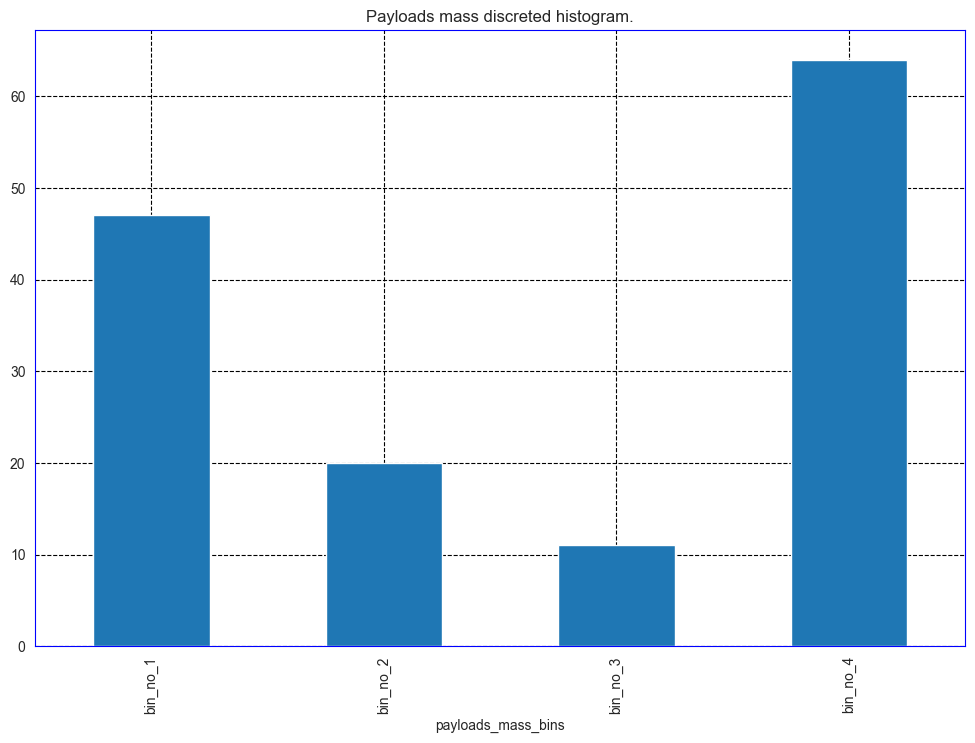

In [557]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.title("Payloads mass discreted histogram.")
plt.show()

**TODO: Describe your observation from chart**

Biểu đồ này phân bố khối lượng tải trọng (`payloads_mass`) cho thấy khoảng `bin_1` (khối lượng thấp nhất) và `bin_4` (khối lượng cao nhất) có số lượng tải trọng lớn nhất, với `bin_4` cao nhất (khoảng hơn 60 hàng tải), cho thấy nhiều hàng tải có khối lượng lớn. Trong khi đó, `bin_2` và `bin_3` có số lượng thấp hơn, với `bin_3` thấp nhất (khoảng 10 hàng tải), chỉ ra rằng ít hàng tải nằm trong khoảng khối lượng trung bình. Phân bố này cho thấy dữ liệu `payloads_mass` có xu hướng tập trung ở hai đầu (khối lượng nhỏ và lớn), thay vì phân bố đều.

### Equal Frequency Discretization

Equal frequency discretization is a discretization approach in which the bin width is automatically adjusted so that each bin contains exactly the same amount of records and has the same frequency. As a result, the bin intervals will vary. In this part, you'll apply it to the discrete `payloads_mass` column.

- Step 01: To convert a continuous column into equal frequency discretized bins, you maybe want to use the ["qcut()" method](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [558]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.qcut(
    raw_df['payloads_mass'],
    q=4,
    duplicates='drop'
)
# raise NotImplementedError()

- Step 02: Create bin labels

In [559]:
# YOUR CODE HERE
bin_labels_freq = [f'bin_no_{i+1}' for i in range(4)]
# raise NotImplementedError()

- Step 03: Apply the Pandas libraries [`cut()` method](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), it allows you to convert the continuous column values to numeric bin values.

In [560]:
# YOUR CODE HERE
raw_df['payloads_mass_bins'] = pd.cut(
    raw_df['payloads_mass'],
    bins=pd.qcut(raw_df['payloads_mass'], q=4, duplicates='drop').cat.categories,
    labels=bin_labels_freq,
    include_lowest=True
)
# raise NotImplementedError()

Now, we will test by using a bar plot that shows the frequency of payloads mass in each bin.

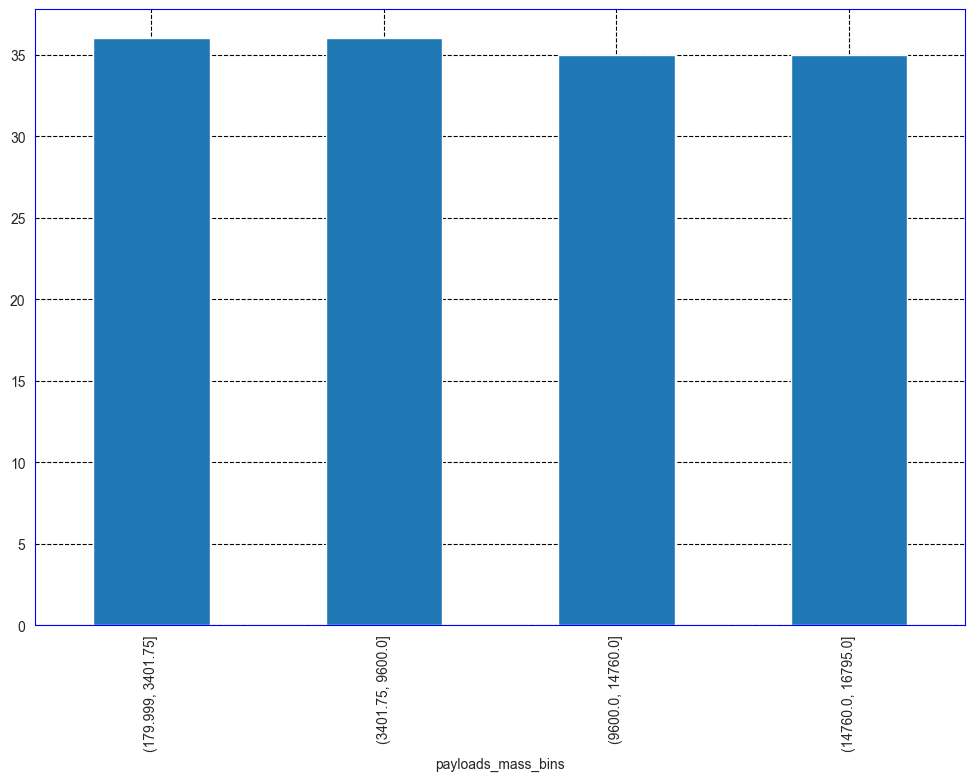

In [561]:
# TEST
raw_df.groupby('payloads_mass_bins')['payloads_mass'].count().plot.bar()
plt.show()

**Bonus points** Study about K-Means Discretization, and Decision Tree Discretization.

YOUR ANSWER HERE (Optional)

In [562]:
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeClassifier

def kmeans_discretization(df, column, n_clusters=4):
    kmeans = KMeans(n_clusters=n_clusters)
    df[f'{column}_kmeans'] = kmeans.fit_predict(df[[column]].dropna())
    return df

def decision_tree_discretization(df, column, target, max_leaf_nodes=4):
    tree = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes)
    df = df.dropna(subset=[column, target])
    tree.fit(df[[column]], df[target])
    df[f'{column}_tree'] = tree.apply(df[[column]])
    return df

# Ví dụ áp dụng K-means
raw_df = kmeans_discretization(raw_df, 'payloads_mass')

# Ví dụ áp dụng Decision Tree
raw_df = decision_tree_discretization(raw_df, 'payloads_mass', 'outcome')

In [563]:
# Exclude "bins" for next section
raw_df = raw_df.drop(["payloads_mass_bins"], axis=1)

## Outlier handling techniques (1 pts)

There are some techniques that you can use to handle outliers:
- Totally removing the outliers from the dataset.
- Treating outliers as missing values, and then apply any techniques to filter them.
- Applying discretization techniques to the dataset that will include the outlier along with other data points at the tail.
- Capping and replacing them with maximum and minimum values that can be found via some techniques.

### Outlier Trimming

Outlier trimming is an outlier handling technique that simply removes the outliers beyond a certain threshold value. And the easiest way to determine this threshold value is to use the IQR.

Let’s remove the outliers from the `payloads_mass` column of this dataset.

- Step 01: Using box plot to visualize the outliers.

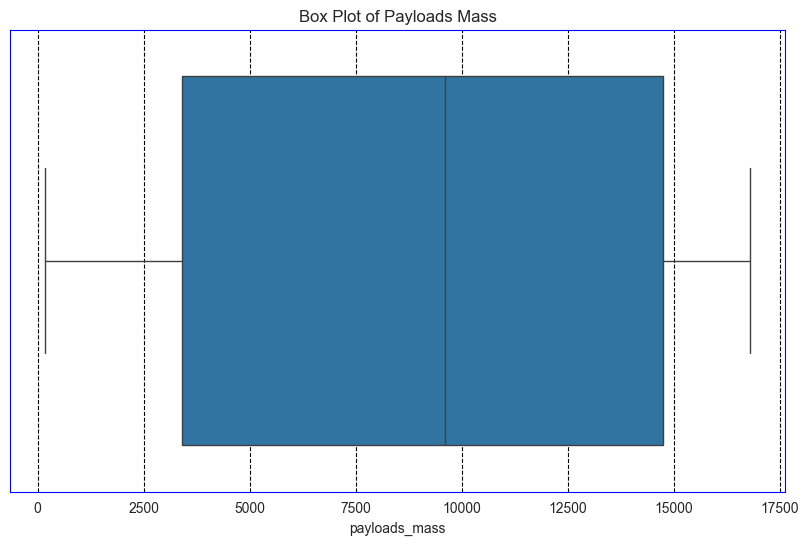

In [564]:
# YOUR CODE HERE
plt.figure(figsize=(10, 6))
sns.boxplot(x=raw_df['payloads_mass'])
plt.title('Box Plot of Payloads Mass')
plt.show()

Very lucky, we have no outliers. :D

- Step 02: Calculate IQR and determine the lower bound and upper bound for `payloads_mass`

In [565]:
IQR = raw_df["payloads_mass"].quantile(0.75) - raw_df["payloads_mass"].quantile(0.25)

lower_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.25) - (IQR * 1.5)
upper_payloads_mass_limit = raw_df["payloads_mass"].quantile(0.75) + (IQR * 1.5)

print(f"The lower bound for payloads limitation: {lower_payloads_mass_limit}")
print(f"The upper bound for payloads limitation: {upper_payloads_mass_limit}")

The lower bound for payloads limitation: -13635.625
The upper bound for payloads limitation: 31797.375


- Step 03: Construct rule for trimming outliers.

In [566]:
payloadsmass_outliers = np.where(
    raw_df["payloads_mass"] > upper_payloads_mass_limit,
    True,
    np.where(raw_df["payloads_mass"] < lower_payloads_mass_limit, True, False),
)

- Step 04: Trimming outliers

In [567]:
rawdf_without_payloadsmass_outliers = raw_df.loc[~(payloadsmass_outliers), ]

raw_df.shape, payloadsmass_outliers.shape

((142, 186), (142,))

TODO: What are the advantages and disadvantages of outlier trimming?

- Ưu điểm của kỹ thuật xử lý `outlier trimming` là loại bỏ hoàn toàn các giá trị bất thường vượt quá ngưỡng nhất định, giúp tập dữ liệu sạch hơn và giảm tác động của các giá trị ngoại lai đến phân tích và khai phá dữ liệu. Một ưu điểm khác là dễ triển khai với chỉ vài dòng mã. 

- Tuy nhiên, nhược điểm của nó là làm giảm kích thước tập dữ liệu, có thể gây mất thông tin quan trọng, đặc biệt với tập dữ liệu nhỏ (dưới 200 hàng như dữ liệu hiện tại); nếu ngoại lai mang ý nghĩa thực tế, việc loại bỏ có thể làm sai lệch kết quả.

### Outlier Capping Using IQR

I am very smart to use IQR to demonstrate the above technique, and for this section, I don't have to demonstrate it again. :)

TODO: Tell me, what is the IQR distance normally used to cap outliers via IQR?

Trong kỹ thuật *Outlier Capping* sử dụng *IQR*, khoảng cách *IQR* thường được sử dụng để giới hạn ngoại lai là 1.5 lần *IQR*, tính từ phân vị 25% (Q1) và phân vị 75% (Q3), nhằm thay thế các giá trị nhỏ hơn giới hạn dưới bằng giá trị giới hạn dưới và các giá trị lớn hơn giới hạn trên bằng giá trị giới hạn trên.

Hệ số 1.5 là tiêu chuẩn phổ biến vì nó bao phủ phần lớn dữ liệu trong trường hợp phân phối chuẩn, đảm bảo giữ lại phần lớn dữ liệu hợp lý trong khi xử lý các giá trị ngoại lai. Tuy nhiên, trong một số trường hợp, hệ số 3.0 có thể được sử dụng nếu muốn giữ lại nhiều dữ liệu hơn, đặc biệt khi dữ liệu có phân phối không chuẩn hoặc lệch mạnh. Như ở đoạn code phía trên thì dùng hệ số 1.5

### Outlier Capping Using Mean & Standard Deviation

Instead of using the IQR method, the upper and lower thresholds for outliers can be calculated via the mean and standard deviation method.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `mean` + 3 * `sigma`

`lower_bound` = `mean` - 3 * `sigma`

In [568]:
# YOUR CODE HERE
mean_mass = raw_df['payloads_mass'].mean()
std_mass = raw_df['payloads_mass'].std()
upper_bound = mean_mass + 3 * std_mass
lower_bound = mean_mass - 3 * std_mass
# raise NotImplementedError()

- Step 02: Construct rule for trimming outliers.

In [569]:
# YOUR CODE HERE
mass_outliers = np.where(
    raw_df['payloads_mass'] > upper_bound,
    True,
    np.where(raw_df['payloads_mass'] < lower_bound, True, False)
)
# raise NotImplementedError()

- Step 03: Trimming outliers

In [570]:
# YOUR CODE HERE
raw_df_no_outliers = raw_df.loc[~mass_outliers]
# raise NotImplementedError()

TODO: What are the advantages and disadvantages of using mean and standard deviation? Tell me, what is the quartile distance normally used to cap outliers via mean and standard deviation? Give your explaination.

Ưu điểm và nhược điểm của việc sử dụng `Mean` và `Standard Deviation`:
- Phương pháp sử dụng trung bình (`mean`) và độ lệch chuẩn (`standard deviation`) để giới hạn ngoại lai có ưu điểm là đơn giản, dễ tính toán và dựa trên đặc điểm thống kê của dữ liệu, phù hợp khi dữ liệu có phân phối gần chuẩn (`normal distribution`)
- Tuy nhiên, nhược điểm là phương pháp này rất nhạy cảm với các giá trị ngoại lai (vì chính các ngoại lai làm lệch giá trị trung bình và độ lệch chuẩn), và không hiệu quả nếu dữ liệu lệch mạnh (`skewed`).

Khoảng cách phân vị thường được sử dụng để giới hạn ngoại lai bằng `Mean` và `Standard Deviation`: khoảng (+-)3 độ lệch chuẩn tương ứng với khoảng từ phân vị 0.15% đến 99.85% trong phân phối chuẩn, nghĩa là các giá trị ngoài khoảng này được coi là ngoại lai, nhưng điều này chỉ đúng khi dữ liệu có phân phối chuẩn.

### Outlier Capping Using Quantiles

Furthermore, the upper and lower thresholds for outliers can be calculated via quantile information. We can use it to find outliers.

- Step 01: Determine the the upper and lower thresholds.

`upper_bound` = `quantile` 90%

`lower_bound` = `quantile` 10%

In [571]:
# YOUR CODE HERE
upper_bound = raw_df['payloads_mass'].quantile(0.90)
lower_bound = raw_df['payloads_mass'].quantile(0.10)
# raise NotImplementedError()

- Step 02: Construct rule for trimming outliers.

In [572]:
# YOUR CODE HERE
mass_outliers_quantile = np.where(
    raw_df['payloads_mass'] > upper_bound,
    True,
    np.where(raw_df['payloads_mass'] < lower_bound, True, False)
)
# raise NotImplementedError()

- Step 03: Trimming outliers

In [573]:
# YOUR CODE HERE
raw_df_no_outliers_quantile = raw_df.loc[~mass_outliers_quantile]
# raise NotImplementedError()

TODO: What are the advantages and disadvantages of using Quantiles?

- Phương pháp sử dụng phân vị (`quantiles`) để giới hạn ngoại lai có ưu điểm là không phụ thuộc vào giả định phân phối của dữ liệu, do đó hiệu quả với cả dữ liệu lệch (`skewed`) hoặc không chuẩn, và cho phép linh hoạt lựa chọn ngưỡng để giữ lại tỷ lệ dữ liệu mong muốn. Ngoài ra, nó ít bị ảnh hưởng bởi các giá trị ngoại lai so với phương pháp `mean` và `standard deviation`. 

- Tuy nhiên, nhược điểm là việc chọn ngưỡng phân vị (ví dụ như 10% và 90%) mang tính chủ quan, có thể dẫn đến việc loại bỏ quá nhiều hoặc quá ít dữ liệu, và không tận dụng được thông tin về phân phối tổng thể của dữ liệu, có thể bỏ qua các đặc điểm quan trọng nếu ngưỡng không được chọn cẩn thận; ví dụ, với cột `payloads_mass`, nếu phân vị 10% và 90% không phản ánh đúng mức độ bất thường của dữ liệu, việc loại bỏ có thể không chính xác.

## Feature scaling techniques (2 pts)

As you know, in any dataset, there are also many different attributes. And the attributes can have different magnitudes, and statistical information includes variances, standard deviations, mean values, etc. The difference in the scale or magnitude of attributes can actually affect statistical models, such as:
- The dominance of large-scale variables
- Gradient descent algorithm for convergence
- Eclidean distance affects similarity among features.

In this section, I give you some techniques that can be applied in some situations.

### Standardisation

Standardization is the processing of centering the variable at zero and standardizing the data variance to 1. Now, I will you an example for numerical variable in `raw_df` and visualize on `payloads_mass` attributes.

- Step 01: Init

In [574]:
scaler = StandardScaler()

In [575]:
raw_df.head()

,uct_time,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,l

- Step 02: Fitting

In [576]:
scaler.fit(raw_df.drop(["uct_time"], axis=1))

StandardScaler()

- Step 03: Transform data

In [577]:
raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

- Step 04: Test

In [578]:
raw_df_scaled.head()

,rocket_boosters,rocket_height,rocket_diameter,rocket_mass,outcome,payloads_mass,launchpad_geo_x,launchpad_geo_y,landpad_geo_x,landpad_geo_y,launch_name_ABS-2A / Eutelsat 117W B,launch_name_ANASIS-II,launch_name_Amos-6,launch_name_ArabSat 6A,launch_name_Ax-1,launch_name_Bangabandhu-1,launch_name_Boeing X-37B OTV-5,launch_name_BulgariaSat-1,launch_name_CCtCap Demo Mission 1,launch_name_CCtCap Demo Mission 2,launch_name_CRS-10,launch_name_CRS-11,launch_name_CRS-12,launch_name_CRS-13,launch_name_CRS-16,launch_name_CRS-17,launch_name_CRS-18,launch_name_CRS-19,launch_name_CRS-20,launch_name_CRS-21,launch_name_CRS-22 & IROSA,launch_name_CRS-23,launch_name_CRS-24,launch_name_CRS-5,launch_name_CRS-6,launch_name_CRS-7,launch_name_CRS-8,launch_name_CRS-9,launch_name_CSG-2,launch_name_Crew-1,launch_name_Crew-3,launch_name_Crew-4,launch_name_DART,launch_name_Es’hail 2,launch_name_Falcon Heavy Test Flight,launch_name_FormoSat-5,launch_name_GPS III SV03 (Columbus),launch_name_GPS III SV04 (Sacagawea),launch_name_GPS III SV05,launch_name_Globalstar FM15,launch_name_IXPE,launch_name_Inspiration4,launch_name_Iridium NEXT Mission 1,launch_name_Iridium NEXT Mission 2,launch_name_Iridium NEXT Mission 3,launch_name_Iridium NEXT Mission 7,launch_name_Iridium NEXT Mission 8,launch_name_JCSAT-16,launch_name_JCSAT-2B,launch_name_JCSat 18 / Kacific 1,launch_name_Jason 3,launch_name_KPLO,launch_name_KoreaSat 5A,launch_name_Merah Putih,launch_name_NROL-85,launch_name_Nilesat-301,launch_name_Nusantara Satu (PSN-6) / S5 / Beresheet,launch_name_OG-2 Mission 2,launch_name_RADARSAT Constellation,launch_name_SAOCOM 1A,"launch_name_SAOCOM 1B, GNOMES-1, Tyvak-0172",launch_name_SARah 1,launch_name_SES-10,launch_name_SES-11 / Echostar 105,launch_name_SES-22,launch_name_SES-9,launch_name_SSO-A,launch_name_STP-2,launch_name_SXM-7,launch_name_SXM-8,launch_name_Sentinel-6 Michael Freilich,launch_name_Starlink 2-1 (v1.5),launch_name_Starlink 3-1 (v1.5),launch_name_Starlink 3-2 (v1.5),launch_name_Starlink 3-3 (v1.5),launch_name_Starlink 3-4 (v1.5),launch_name_Starlink 4-1 (v1.5),launch_name_Starlink 4-10 (v1.5),launch_name_Starlink 4-11 (v1.5),launch_name_Starlink 4-12 (v1.5),launch_name_Starlink 4-13 (v1.5),launch_name_Starlink 4-14 (v1.5),launch_name_Starlink 4-15 (v1.5),launch_name_Starlink 4-16 (v1.5),launch_name_Starlink 4-17 (v1.5),launch_name_Starlink 4-18 (v1.5),launch_name_Starlink 4-19 (v1.5),launch_name_Starlink 4-2 (v1.5) & Blue Walker 3,launch_name_Starlink 4-20 (v1.5) & Sherpa LTC-2/Varuna-TDM,launch_name_Starlink 4-21 (v1.5),launch_name_Starlink 4-22 (v1.5),launch_name_Starlink 4-23 (v1.5),launch_name_Starlink 4-25 (v1.5),launch_name_Starlink 4-26 (v1.5),launch_name_Starlink 4-27 (v1.5),launch_name_Starlink 4-3 (v1.5),launch_name_Starlink 4-34 (v1.5),launch_name_Starlink 4-35 (v1.5),launch_name_Starlink 4-4 (v1.5),launch_name_Starlink 4-5 (v1.5),launch_name_Starlink 4-6 (v1.5),launch_name_Starlink 4-7 (v1.5),launch_name_Starlink 4-8 (v1.5),launch_name_Starlink 4-9 (v1.5),launch_name_Starlink v0.9,launch_name_Starlink-1,launch_name_Starlink-10 (v1.0) & SkySat 19-21,launch_name_Starlink-11 (v1.0),launch_name_Starlink-12 (v1.0),launch_name_Starlink-13 (v1.0),launch_name_Starlink-14 (v1.0),launch_name_Starlink-15 (v1.0),launch_name_Starlink-16 (v1.0),launch_name_Starlink-17 (v1.0),launch_name_Starlink-18 (v1.0),launch_name_Starlink-19 (v1.0),launch_name_Starlink-2,launch_name_Starlink-20 (v1.0),launch_name_Starlink-21 (v1.0),launch_name_Starlink-22 (v1.0),launch_name_Starlink-23 (v1.0),launch_name_Starlink-24 (v1.0),launch_name_Starlink-25 (v1.0),launch_name_Starlink-26 (v1.0) + Capella-6 + Tyvak-0130,launch_name_Starlink-27 (v1.0),launch_name_Starlink-28 (v1.0),launch_name_Starlink-3,launch_name_Starlink-4,launch_name_Starlink-5,launch_name_Starlink-6,launch_name_Starlink-7,launch_name_Starlink-8 & SkySat 16-18,launch_name_Starlink-9 (v1.0) & BlackSky Global 5-6,launch_name_TESS,launch_name_Telstar 18V,launch_name_Telstar 19V,launch_name_Thaicom 8,launch_nam

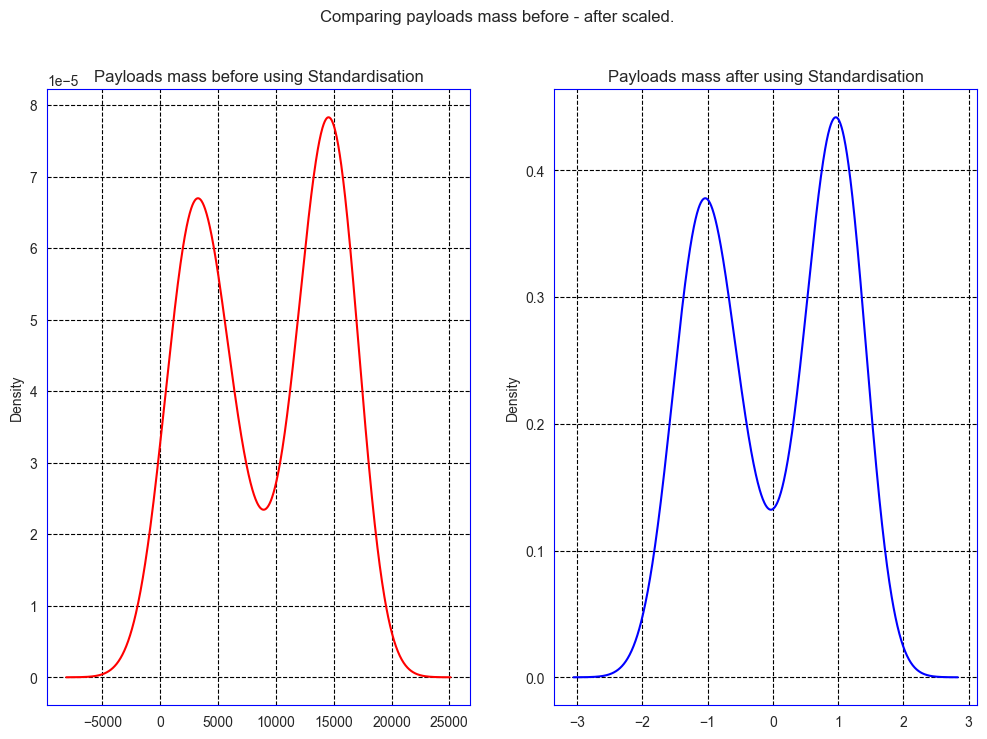

In [579]:
fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads mass after using Standardisation")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()

**TODO: Describe your observation from chart**

Biểu đồ so sánh phân bố khối lượng tải trọng (`payloads_mass`) trước và sau khi chuẩn hóa bằng phương pháp `Standardization` bao gồm hai đồ thị mật độ. 

Đồ thị bên trái (màu đỏ) thể hiện phân bố trước khi chuẩn hóa, với trục x dao động từ khoảng -5000 đến 25000, cho thấy dữ liệu có hai đỉnh rõ rệt: một đỉnh lớn quanh 0 và một đỉnh nhỏ hơn quanh 15000, với mật độ cao nhất khoảng 8e-5, phản ánh sự phân tán lớn và không đồng đều của khối lượng tải trọng. 

Đồ thị bên phải (màu xanh) thể hiện phân bố sau khi chuẩn hóa, với trục x nằm trong khoảng -3 đến 3, cũng có hai đỉnh tương tự nhưng dữ liệu đã được co giãn về trung bình 0 và độ lệch chuẩn 1, với mật độ cao nhất khoảng 0.4, cho thấy phân bố trở nên tập trung hơn và các giá trị được chuẩn hóa đồng đều, giữ nguyên hình dạng phân phối và đỉnh như đồ thị bên trái nhưng trên thang đo mới.

### Min/Max Scaling

Min/max scaling subtracts each value by the minimum value, and then divide the result by the difference of minimum and maximum value in the dataset.

TODO: Use `sckit-learn` for applying min/max scaling to the `payloads_mass` column.

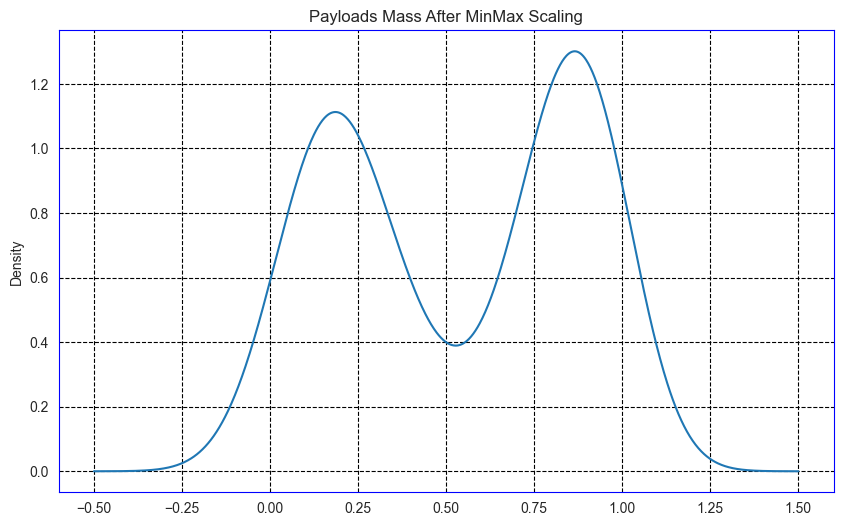

In [580]:
# YOUR CODE HERE
scaler = MinMaxScaler()
raw_df['payloads_mass_minmax'] = scaler.fit_transform(
    raw_df[['payloads_mass']].fillna(raw_df['payloads_mass'].mean())
)

plt.figure(figsize=(10, 6))
raw_df['payloads_mass_minmax'].plot(kind='kde')
plt.title('Payloads Mass After MinMax Scaling')
plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

Biểu đồ mật độ thể hiện phân bố khối lượng tải trọng (`payloads_mass`) sau khi được chuẩn hóa bằng phương pháp `MinMax Scaling`, với trục x dao động từ khoảng -0.50 đến 1.50 và trục y là mật độ từ 0 đến 1.2. Phân bố dữ liệu có dạng `bimodal` với hai đỉnh rõ rệt: một đỉnh lớn ở khoảng 0.0 và một đỉnh nhỏ hơn ở khoảng 0.75, cho thấy dữ liệu tập trung chủ yếu ở hai mức khối lượng (thấp và trung bình-cao) sau khi chuẩn hóa. Mật độ cao nhất đạt khoảng 1.2 tại đỉnh đầu tiên, trong khi phần giữa hai đỉnh (khoảng 0.25 đến 0.50) có mật độ thấp, phản ánh sự phân tách rõ ràng giữa hai nhóm giá trị. `MinMax Scaling` đã đưa dữ liệu về thang [0, 1], nhưng một số giá trị âm (dưới 0) và trên 1 cho thấy có thể dữ liệu đã được xử lý thêm hoặc có ngoại lai trước khi chuẩn hóa.

### Mean Normalization

Mean normalization is very similar to min/max scaling.

**TODO: Tell me what is the difference between mean normalization and min/ max scaling.**

`Mean Normalization` và `Min/Max Scaling` đều là các kỹ thuật chuẩn hóa dữ liệu, nhưng chúng khác nhau về cách biến đổi và thang đo kết quả.

Mean Normalization chuẩn hóa dữ liệu bằng cách trừ mỗi giá trị cho trung bình (`mean`) của tập dữ liệu, sau đó chia cho hiệu giữa giá trị lớn nhất và nhỏ nhất (`max - min`), đưa dữ liệu về thang có trung bình bằng 0, với công thức: `(x - mean) / (max - min)`; điều này làm cho dữ liệu dao động quanh 0, thường trong khoảng [-1, 1]. 

Trong khi đó, Min/Max Scaling biến đổi dữ liệu về một thang cố định (thường là [0, 1]) bằng cách trừ giá trị nhỏ nhất (`min`) và chia cho hiệu `max - min`, với công thức: `(x - min) / (max - min)`, đảm bảo giá trị nhỏ nhất là 0 và lớn nhất là 1. Quan sát từ biểu đồ trước đó của `payloads_mass` sau `Min/Max Scaling`, dữ liệu dao động từ -0.5 đến 1.5, cho thấy có thể đã có ngoại lai hoặc dữ liệu được xử lý thêm, trong khi `Mean Normalization` sẽ làm dữ liệu tập trung quanh 0, có thể thay đổi hình dạng phân bố so với `Min/Max Scaling`.

TODO: Use `sckit-learn` for applying mean normalization to the `payloads_mass` column.

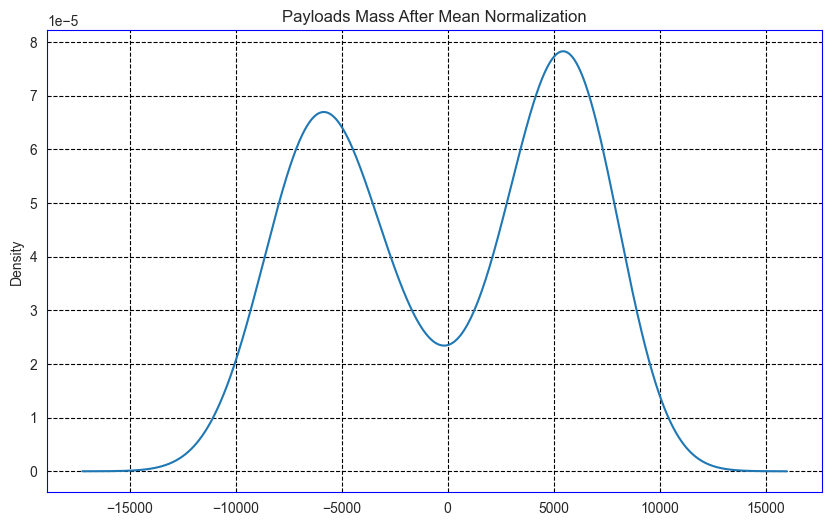

In [581]:
# YOUR CODE HERE
scaler = StandardScaler(with_mean=True, with_std=False)
raw_df['payloads_mass_mean'] = scaler.fit_transform(
    raw_df[['payloads_mass']].fillna(raw_df['payloads_mass'].mean())
)

plt.figure(figsize=(10, 6))
raw_df['payloads_mass_mean'].plot(kind='kde')
plt.title('Payloads Mass After Mean Normalization')
plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

Biểu đồ mật độ thể hiện phân bố khối lượng tải trọng (`payloads_mass`) sau khi được chuẩn hóa bằng phương pháp `Mean Normalization`, với trục x dao động từ khoảng -15000 đến 15000 và trục y là mật độ từ 0 đến 8e-5. Phân bố dữ liệu có dạng `bimodal` với hai đỉnh rõ rệt: một đỉnh lớn ở khoảng -5000 và một đỉnh nhỏ hơn ở khoảng 10000, cho thấy dữ liệu tập trung chủ yếu ở hai mức khối lượng (thấp và cao) sau khi chuẩn hóa. Mật độ cao nhất đạt khoảng 8e-5 tại đỉnh đầu tiên, trong khi phần giữa hai đỉnh (khoảng 0) có mật độ thấp, phản ánh sự phân tách rõ ràng giữa hai nhóm giá trị. `Mean Normalization` đã đưa trung bình của dữ liệu về 0, nhưng phạm vi giá trị vẫn rộng, tương tự như trước khi chuẩn hóa, cho thấy phương pháp này chủ yếu dịch chuyển dữ liệu mà không thay đổi đáng kể độ phân tán. So với `Min/Max Scaling` (biểu đồ trước), `Mean Normalization` không giới hạn dữ liệu trong thang [0, 1], dẫn đến trục x có phạm vi lớn hơn.

### Maximum Absolute Scaling

Maximum absolute scaling is probably the simplest of all the scaling techniques. In maximum absolute scaling, each data point is simply divided by the maximum value.

TODO: Use `sckit-learn` for applying maximum absolute scaling to the `payloads_mass` column.

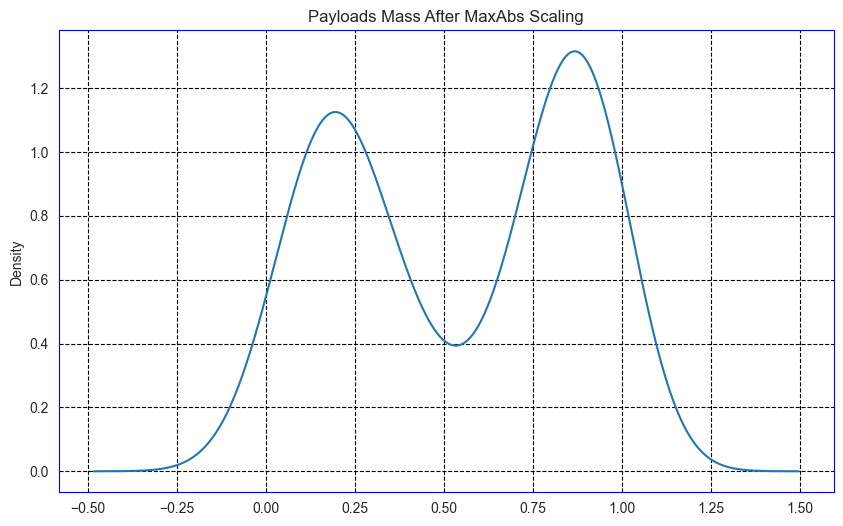

In [582]:
# YOUR CODE HERE
scaler = MaxAbsScaler()
raw_df['payloads_mass_maxabs'] = scaler.fit_transform(
    raw_df[['payloads_mass']].fillna(raw_df['payloads_mass'].mean())
)

plt.figure(figsize=(10, 6))
raw_df['payloads_mass_maxabs'].plot(kind='kde')
plt.title('Payloads Mass After MaxAbs Scaling')
plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

Biểu đồ mật độ thể hiện phân bố khối lượng tải trọng (`payloads_mass`) sau khi được chuẩn hóa bằng phương pháp `MaxAbs Scaling`, với trục x dao động từ khoảng -0.50 đến 1.50 và trục y là mật độ từ 0 đến 1.2. Phân bố dữ liệu có dạng `bimodal` với hai đỉnh rõ rệt: một đỉnh lớn ở khoảng 0.0 và một đỉnh nhỏ hơn ở khoảng 0.75, cho thấy dữ liệu tập trung chủ yếu ở hai mức khối lượng (thấp và trung bình-cao) sau khi chuẩn hóa. Mật độ cao nhất đạt khoảng 1.2 tại đỉnh đầu tiên, trong khi phần giữa hai đỉnh (khoảng 0.25 đến 0.50) có mật độ thấp, phản ánh sự phân tách rõ ràng giữa hai nhóm giá trị. So với biểu đồ `Min/Max Scaling` trước đó, kết quả của `MaxAbs Scaling` rất giống, với trục x cũng dao động từ -0.50 đến 1.50, vì `MaxAbs Scaling` chuẩn hóa dữ liệu bằng cách chia cho giá trị tuyệt đối lớn nhất, đưa dữ liệu về thang [-1, 1], nhưng trong trường hợp này, dữ liệu có vẻ không có giá trị âm lớn, dẫn đến phạm vi tương tự `Min/Max Scaling`.

### Median and Quantile Scaling

In median and quantile scaling, the mean of the dataset is subtracted from all the data points, and the result is divided by the difference between the first quartile and the 3rd quartile.

TODO: Use `sckit-learn` for applying median and quantile scaling to the `payloads_mass` column.

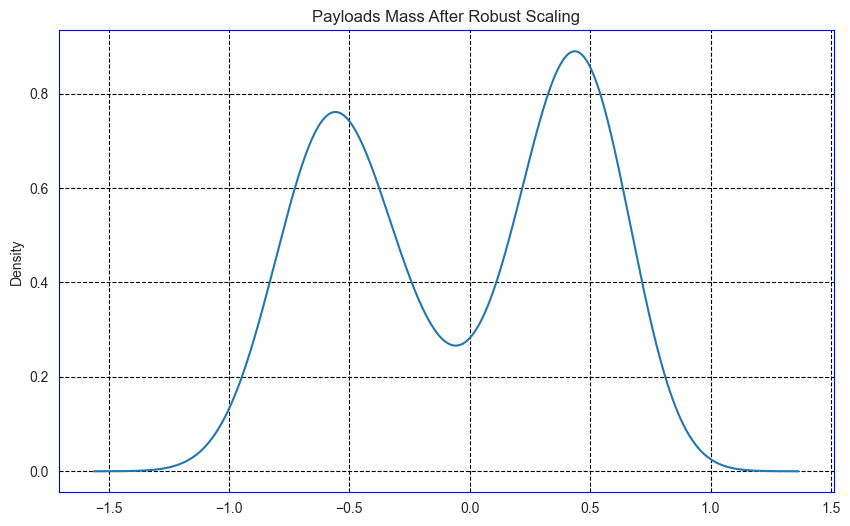

In [583]:
# YOUR CODE HERE
from sklearn.preprocessing import RobustScaler


scaler = RobustScaler()
raw_df['payloads_mass_robust'] = scaler.fit_transform(
    raw_df[['payloads_mass']].fillna(raw_df['payloads_mass'].mean())
)

plt.figure(figsize=(10, 6))
raw_df['payloads_mass_robust'].plot(kind='kde')
plt.title('Payloads Mass After Robust Scaling')
plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

Biểu đồ mật độ thể hiện phân bố khối lượng tải trọng (`payloads_mass`) sau khi được chuẩn hóa bằng phương pháp `Robust Scaling`, với trục x dao động từ khoảng -1.5 đến 1.5 và trục y là mật độ từ 0 đến 0.8. Phân bố dữ liệu có dạng `bimodal` với hai đỉnh rõ rệt: một đỉnh lớn ở khoảng -0.5 và một đỉnh nhỏ hơn ở khoảng 0.75, cho thấy dữ liệu tập trung chủ yếu ở hai mức khối lượng (thấp và trung bình-cao) sau khi chuẩn hóa. Mật độ cao nhất đạt khoảng 0.8 tại đỉnh đầu tiên, trong khi phần giữa hai đỉnh (khoảng 0.0) có mật độ thấp, phản ánh sự phân tách rõ ràng giữa hai nhóm giá trị. `Robust Scaling` sử dụng trung vị (`median`) và khoảng tứ phân vị (`IQR`) để chuẩn hóa, đã đưa trung bình dữ liệu về 0 và giảm ảnh hưởng của ngoại lai, dẫn đến phạm vi trục x hẹp hơn so với `Mean Normalization` (trước đó dao động từ -15000 đến 15000), nhưng tương tự `Min/Max` và `MaxAbs Scaling` (dao động từ -0.5 đến 1.5), với hình dạng phân bố `bimodal` được giữ nguyên.

### Vector Unit Length Scaling

In unit length scaling, a new feature vector is created by dividing feature vector by the Manhattan distance (l1 norm), or by the Euclidian distance (l2 norm).

TODO: Use `sckit-learn` for applying vector unit length scaling to the `payloads_mass` column.

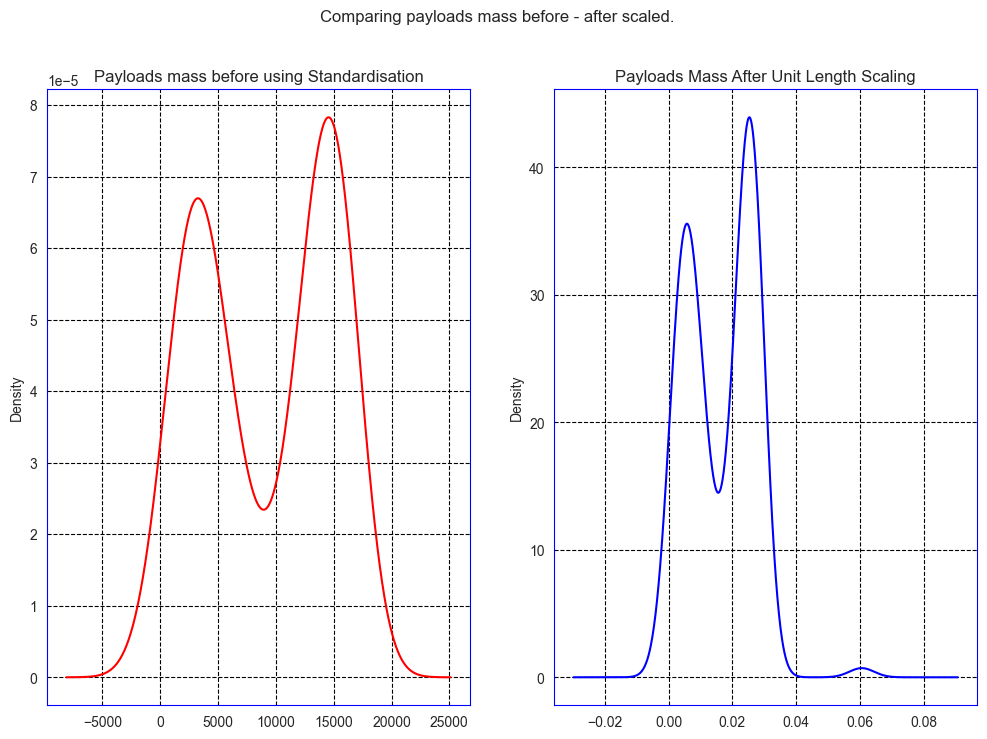

In [584]:
# YOUR CODE HERE
# scaler = Normalizer(norm='l2')
# raw_df['payloads_mass_norm'] = scaler.fit_transform(
#     raw_df[['payloads_mass']].fillna(raw_df['payloads_mass'].mean())
# )

# plt.figure(figsize=(10, 6))
# raw_df['payloads_mass_norm'].plot(kind='kde')
# plt.title('Payloads Mass After Unit Length Scaling')
# plt.show()

scaler = Normalizer('l1')

scaler.fit(raw_df.drop(["uct_time"], axis=1))

raw_df_scaled = scaler.transform(raw_df.drop(["uct_time"], axis=1))
raw_df_scaled = pd.DataFrame(raw_df_scaled, columns = raw_df.drop(["uct_time"], axis=1).columns)

raw_df_scaled.head()

fig, axes = plt.subplots(1, 2)

raw_df["payloads_mass"].plot(kind="kde", ax=axes[0], color="red")
axes[0].set_title("Payloads mass before using Standardisation")

raw_df_scaled["payloads_mass"].plot(kind="kde", ax=axes[1], color="blue")
axes[1].set_title("Payloads Mass After Unit Length Scaling")

fig.suptitle("Comparing payloads mass before - after scaled.")

plt.show()
# raise NotImplementedError()

**TODO: After visualizing the results, describe your observation from chart**

Biểu đồ so sánh phân bố khối lượng tải trọng (`payloads_mass`) trước và sau khi chuẩn hóa bằng phương pháp `Unit Length Scaling` bao gồm hai đồ thị mật độ.

Đồ thị bên trái (màu đỏ) thể hiện phân bố trước khi chuẩn hóa, với trục x dao động từ khoảng -5000 đến 25000, cho thấy dữ liệu có hai đỉnh: một đỉnh lớn quanh 0 và một đỉnh nhỏ hơn quanh 15000, với mật độ cao nhất khoảng 8e-5, phản ánh sự phân tán lớn và không đồng đều của khối lượng hàng tải. 

Đồ thị bên phải (màu xanh) thể hiện phân bố sau khi chuẩn hóa, với trục x thu hẹp đáng kể từ -0.02 đến 0.08, cũng có hai đỉnh tương tự nhưng mật độ cao hơn nhiều, đạt khoảng 40 tại đỉnh đầu tiên, cho thấy `Unit Length Scaling` (chuẩn hóa bằng cách chia cho chuẩn L1/L2) đã nén dữ liệu về thang rất nhỏ, làm tăng mật độ và giữ nguyên hình dạng `bimodal`, nhưng các giá trị được co giãn mạnh, khiến phân bố trở nên tập trung hơn nhiều so với trước khi chuẩn hóa.

### When and where to apply these normalization techniques?

**Question**: After these a bund of normalization techniques, tell me when and where to apply these normalization techniques?

Các kỹ thuật chuẩn hóa đã làm ở trên như `Standardisation`, `Min/Max Scaling`, `Mean Normalization`, `MaxAbs Scaling`, `Robust Scaling`, và `Unit Length Scaling` nên được áp dụng trong giai đoạn tiền xử lý dữ liệu (`preprocessing`) trước khi huấn luyện mô hình học máy hay khai phá dữ liệu, đặc biệt khi các đặc trưng (`features`) trong tập dữ liệu có thang đo khác nhau hoặc phân bố không đồng đều, nhằm đảm bảo tất cả đặc trưng có cùng tầm quan trọng và cải thiện hiệu suất mô hình. 

Chúng thường được sử dụng khi làm việc với các thuật toán nhạy cảm với thang đo, chẳng hạn như hồi quy tuyến tính, hồi quy logistic, `SVM`, hoặc mạng nơ-ron, và ở các bước như chuẩn bị dữ liệu đầu vào hoặc trong `pipeline` xử lý dữ liệu trước khi chia tập `train/test`. Ví dụ, `Standardisation` (đưa dữ liệu về trung bình 0, độ lệch chuẩn 1) phù hợp cho dữ liệu có phân phối gần chuẩn, trong khi `Robust Scaling` (dùng trung vị và `IQR`) hiệu quả với dữ liệu có ngoại lai, giúp giảm ảnh hưởng của các giá trị bất thường.

End of your lab 01.